# GCash Topic Modeling Notebook
---

## Download and install requisite libraries and packages
---

In [2]:
# for kaggle
import os

print(os.listdir("../input"))
print(os.listdir("/kaggle/working/"))

['reviewdata']
['__notebook_source__.ipynb']


In [3]:
import sys

# for kaggle
!pip install -r ../input/reviewdata/data/requirements.txt

# !pip install -r data/requirements.txt

     |████████████████████████████████| 275 kB 836 kB/s eta 0:00:01
     |████████████████████████████████| 622 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 254 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 65 kB 1.8 MB/s eta 0:00:011
     |████████████████████████████████| 3.2 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 251 kB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 1.8 MB/s eta 0:00:011
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621854 sha256=7edc816cf7b790d16c960f275b9383c5dd67fd02106b12dde192c31e6552ced3
  Stored in directory: /root/.cache/pip/wheels/3d/8e/bd/f6fd900a056a031bf710a00bca338d86f43b83f0c25ab5242f
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7764 sha256=de8ce63bbaa431b54a6cdc79c6d46fdd6

### JupyterLab renderer support
install the required JupyterLab extensions

In [ ]:
!conda install -c conda-forge nodejs -y
!conda install -c plotly plotly-orca -y

In [ ]:
!jupyter labextension install jupyterlab-plotly

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import wordcloud as wc
import seaborn as sns
import pandas as pd 
import numpy as np
import mxnet as mx
import tarfile
import zipfile
import sklearn
import os
from datetime_truncate import truncate

## Import and prepare CSV files
---

In [ ]:
gps_df = pd.read_csv('data/play_store_reviews.csv')
as_df = pd.read_csv('data/app_store_reviews.csv')
combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
gps_df['at'] = pd.to_datetime(gps_df['at'])
as_df['date'] = pd.to_datetime(as_df['date'])
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [ ]:
# drop unnecessary columns
gps_df = gps_df.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt'], axis=1)
gps_df['type'] = 'play store'

gps_df.info()
print(display(gps_df.head(10)))

In [ ]:
as_df = as_df.drop(['title', 'userName', 'isEdited', 'developerResponse'], axis=1)
as_df['type'] = 'app store'

as_df.info()
print(display(as_df.head(10)))

In [ ]:
# init empty DF
combined_df = pd.DataFrame()

# populate lists
date_lst = gps_df['at'].values.tolist() + as_df['date'].values.tolist()
review_lst = gps_df['content'].values.tolist() + as_df['review'].values.tolist()
rating_lst = gps_df['score'].values.tolist() + as_df['rating'].values.tolist()
type_lst = gps_df['type'].values.tolist() + as_df['type'].values.tolist()

# populate DF
combined_df['date'] = date_lst
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['review'] = review_lst
combined_df['rating'] = rating_lst
combined_df['type'] = type_lst

# shuffle rows
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# drop rows that have NULL entries
combined_df = combined_df.dropna()

# drop rows that have duplicates
combined_df = combined_df.drop_duplicates()

combined_df.info()
print(display(combined_df.head(10)))

### Export combined_df as CSV

In [ ]:
combined_df.to_csv('data/combined_reviews.csv', index=False)

## Import CSV files
---

### contains only 1 and 5 star review data from the App Store and Play Store

In [8]:
# for kaggle
combined_df = pd.read_csv('../input/reviewdata/data/GCash/combined_reviews.csv')

# for local
# combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
combined_df['date'] = pd.to_datetime(combined_df['date'])

# create and append month column
combined_df['month'] = combined_df['date'].apply(lambda x: truncate(x, 'month').date())
combined_df['month'] = pd.to_datetime(combined_df['month'])

combined_df = combined_df.sort_values(by=['date'])

combined_df.info()
print(display(combined_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112264 entries, 21958 to 44455
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    112264 non-null  datetime64[ns]
 1   review  112264 non-null  object        
 2   rating  112264 non-null  int64         
 3   type    112264 non-null  object        
 4   month   112264 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 5.1+ MB


date                                             review  \
21958  2020-01-01 00:45:51  I always wanted to cash in for me to use it on...   
103638 2020-01-01 00:54:16                                               Nice   
106902 2020-01-01 01:20:27                                            Awesome   
51213  2020-01-01 02:09:35  Pahelp nmn po dq maaus yung gcash mpin q dhil ...   
84866  2020-01-01 02:22:00                                             faster   
56867  2020-01-01 02:31:30                                        Very useful   
52763  2020-01-01 02:47:23  SINCE NOVEMBER UNTIL NOW I CANNOT CASH IN. BEE...   
61238  2020-01-01 03:04:56                                         Di maganda   
64880  2020-01-01 03:09:50                               POTEK NA GCASH TO...   
79934  2020-01-01 03:15:48                                                 Oh   

        rating        type      month  
21958        1  play store 2020-01-01  
103638       5  play store 2020-01-01  
106902       5  play store 2020-01-01  
51213        1  play store 2020-01-01  
84866        5  play store 2020-01-01  
56867        5  play store 2020-01-01  
52763        1  play store 2020-01-01  
61238        1  play store 2020-01-01  
64880        1  play store 2020-01-01  
79934        1  play store 2020-01-01

None


### contains all review data (rating 1-5) from the App Store and Play Store

In [9]:
# for kaggle
complete_df = pd.read_csv('../input/reviewdata/data/GCash/complete_reviews.csv')

# for local
# complete_df = pd.read_csv('data/complete_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
complete_df['date'] = pd.to_datetime(complete_df['date'])

# create and append month column
complete_df['month'] = complete_df['date'].apply(lambda x: truncate(x, 'month').date())
complete_df['month'] = pd.to_datetime(complete_df['month'])

complete_df = complete_df.sort_values(by=['date'])

print(complete_df.info())
print(display(complete_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138588 entries, 51210 to 20946
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    138588 non-null  datetime64[ns]
 1   review  138588 non-null  object        
 2   rating  138588 non-null  int64         
 3   type    138588 non-null  object        
 4   month   138588 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 6.3+ MB
None


date                                             review  \
51210  2020-01-01 00:04:48  Please fix your app bug. It has been to weeks ...   
138507 2020-01-01 00:45:51  I always wanted to cash in for me to use it on...   
121142 2020-01-01 00:54:16                                               Nice   
8895   2020-01-01 01:20:27                                            Awesome   
112738 2020-01-01 02:09:35  Pahelp nmn po dq maaus yung gcash mpin q dhil ...   
130839 2020-01-01 02:10:56  Gcash is a great app BUT if you tried buying s...   
69338  2020-01-01 02:22:00                                             faster   
60153  2020-01-01 02:31:30                                        Very useful   
59140  2020-01-01 02:33:05  Convenient. I just don't understand why I am a...   
108197 2020-01-01 02:47:23  SINCE NOVEMBER UNTIL NOW I CANNOT CASH IN. BEE...   

        rating        type      month  
51210        2  play store 2020-01-01  
138507       1  play store 2020-01-01  
121142       5  play store 2020-01-01  
8895         5  play store 2020-01-01  
112738       1  play store 2020-01-01  
130839       3   app store 2020-01-01  
69338        5  play store 2020-01-01  
60153        5  play store 2020-01-01  
59140        4  play store 2020-01-01  
108197       1  play store 2020-01-01

None


## Exploratory Data Analysis
---

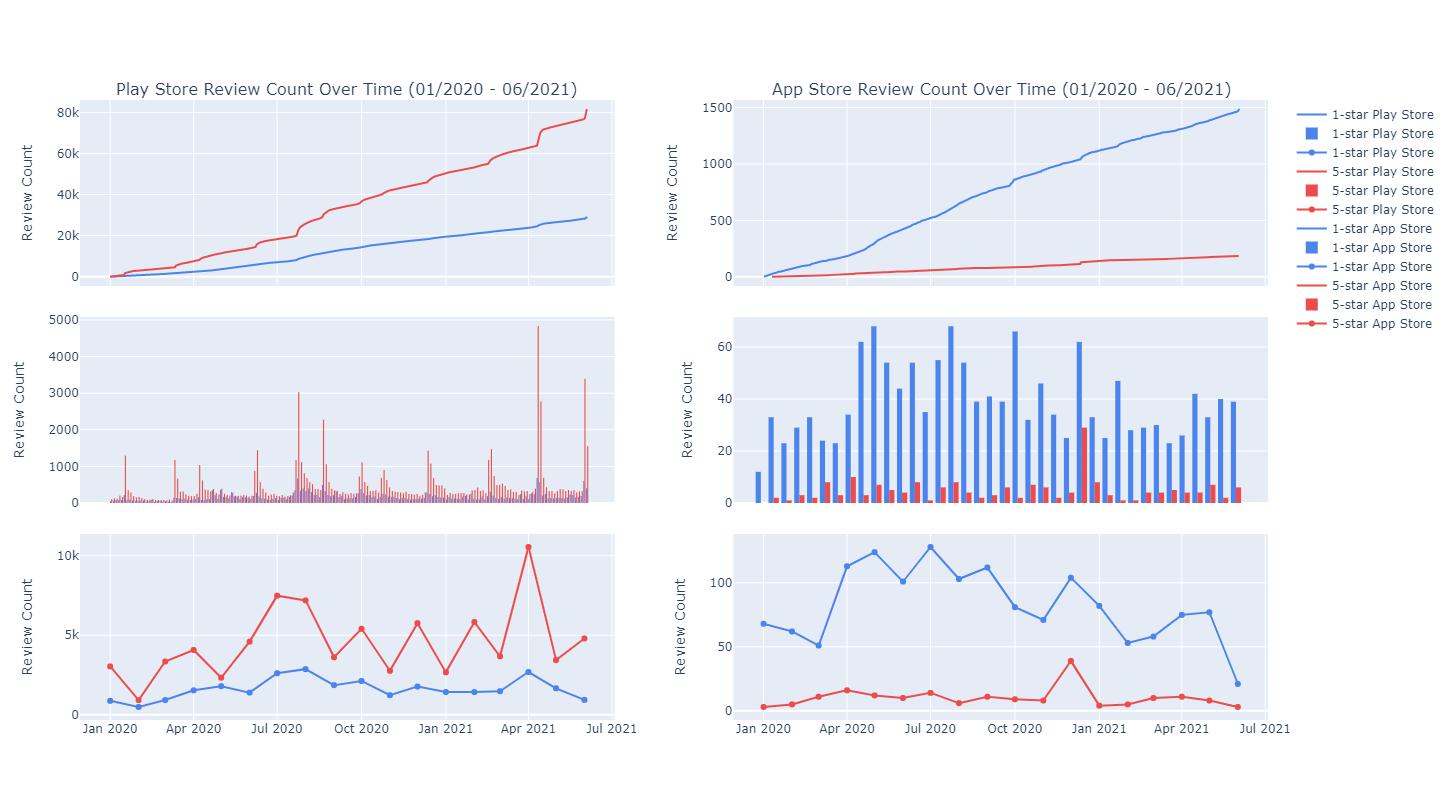

In [18]:
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# set default renderer
pio.renderers.default = "jupyterlab"

# disable false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

ax_1 = combined_df.loc[(combined_df['type'] == 'play store') & (combined_df['rating'] == 1)]
ax_5 = combined_df.loc[(combined_df['type'] == 'play store') & (combined_df['rating'] == 5)]
ax_1 = ax_1.sort_values(by=['date'])
ax_5 = ax_5.sort_values(by=['date'])
ax_1['cumsum'] = ax_1['rating'].eq(1).cumsum()
ax_5['cumsum'] = ax_5['rating'].eq(5).cumsum()
ax_1_ratings = ax_1.groupby(['month', 'rating'])['review'].count().reset_index()
ax_5_ratings = ax_5.groupby(['month', 'rating'])['review'].count().reset_index()

bx_1 = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 1)]
bx_5 = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 5)]
bx_1 = bx_1.sort_values(by=['date'])
bx_5 = bx_5.sort_values(by=['date'])
bx_1['cumsum'] = bx_1['rating'].eq(1).cumsum()
bx_5['cumsum'] = bx_5['rating'].eq(5).cumsum()
bx_1_ratings = bx_1.groupby(['month', 'rating'])['review'].count().reset_index()
bx_5_ratings = bx_5.groupby(['month', 'rating'])['review'].count().reset_index()

fig = make_subplots(
    rows=3, 
    cols=2, 
    shared_xaxes=True,
    vertical_spacing=0.05,
    subplot_titles=("Play Store Review Count Over Time (01/2020 - 06/2021)", "App Store Review Count Over Time (01/2020 - 06/2021)")
)

# Play Store
fig.add_trace(
    go.Scatter(
        x=ax_1['date'],
        y=ax_1['cumsum'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=1
)
fig.add_trace(
    go.Histogram(
        x=ax_1['date'],
        y=ax_1['rating'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_1_ratings['month'],
        y=ax_1_ratings['review'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=3, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_5['date'],
        y=ax_5['cumsum'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)
fig.add_trace(
    go.Histogram(
        x=ax_5['date'],
        y=ax_5['rating'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_5_ratings['month'],
        y=ax_5_ratings['review'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=3, 
    col=1
)

# App Store
fig.add_trace(
    go.Scatter(
        x=bx_1['date'],
        y=bx_1['cumsum'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)
fig.add_trace(
    go.Histogram(
        x=bx_1['date'],
        y=bx_1['rating'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_1_ratings['month'],
        y=bx_1_ratings['review'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=3, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_5['date'],
        y=bx_5['cumsum'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=2
)
fig.add_trace(
    go.Histogram(
        x=bx_5['date'],
        y=bx_5['rating'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_5_ratings['month'],
        y=bx_5_ratings['review'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=3, 
    col=2
)

# Update yaxis properties
fig.update_yaxes(title_text="Review Count")

fig.update_layout(width=1450, height=800)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1750, height=800)

### Hour of the day
---

In [34]:
# Collect and store all App Store reviews in a temporary DF
temp_ax = complete_df.loc[(complete_df['type'] == 'play store')]
temp_ax = temp_ax.sort_values(by=['date'])

# df = df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

gps_avg_rating_hr = temp_ax.groupby(temp_ax['date'].dt.hour)['rating'].mean().reset_index().rename(
    columns = {'date' : 'hour'}
)
gps_avg_rating_hr.head()

hour    rating
0     0  3.863555
1     1  3.752691
2     2  3.708360
3     3  3.704647
4     4  3.737514

In [35]:
# Collect and store all App Store reviews in a temporary DF
temp_bx = complete_df.loc[(complete_df['type'] == 'app store')]
temp_bx = temp_bx.sort_values(by=['date'])

# df = df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

as_avg_rating_hr = temp_bx.groupby(temp_bx['date'].dt.hour)['rating'].mean().reset_index().rename(
    columns = {'date' : 'hour'}
)
as_avg_rating_hr.head()

hour    rating
0     0  2.000000
1     1  1.824818
2     2  2.000000
3     3  1.941558
4     4  1.872340

### Day of the week
---

In [36]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

gps_avg_rating_day = temp_ax.groupby(temp_ax['date'].dt.day_name())['rating'].mean().reindex(days).reset_index().rename(
    columns = {'date' : 'day'}
)
gps_avg_rating_day

day    rating
0     Monday  3.784321
1    Tuesday  3.761463
2  Wednesday  3.914401
3   Thursday  3.786387
4     Friday  3.716821
5   Saturday  3.824149
6     Sunday  3.832882

In [37]:
as_avg_rating_day = temp_bx.groupby(temp_bx['date'].dt.day_name())['rating'].mean().reindex(days).reset_index().rename(
    columns = {'date' : 'day'}
)
as_avg_rating_day

day    rating
0     Monday  1.826347
1    Tuesday  1.900000
2  Wednesday  1.907895
3   Thursday  1.939759
4     Friday  1.942211
5   Saturday  1.849359
6     Sunday  1.807309

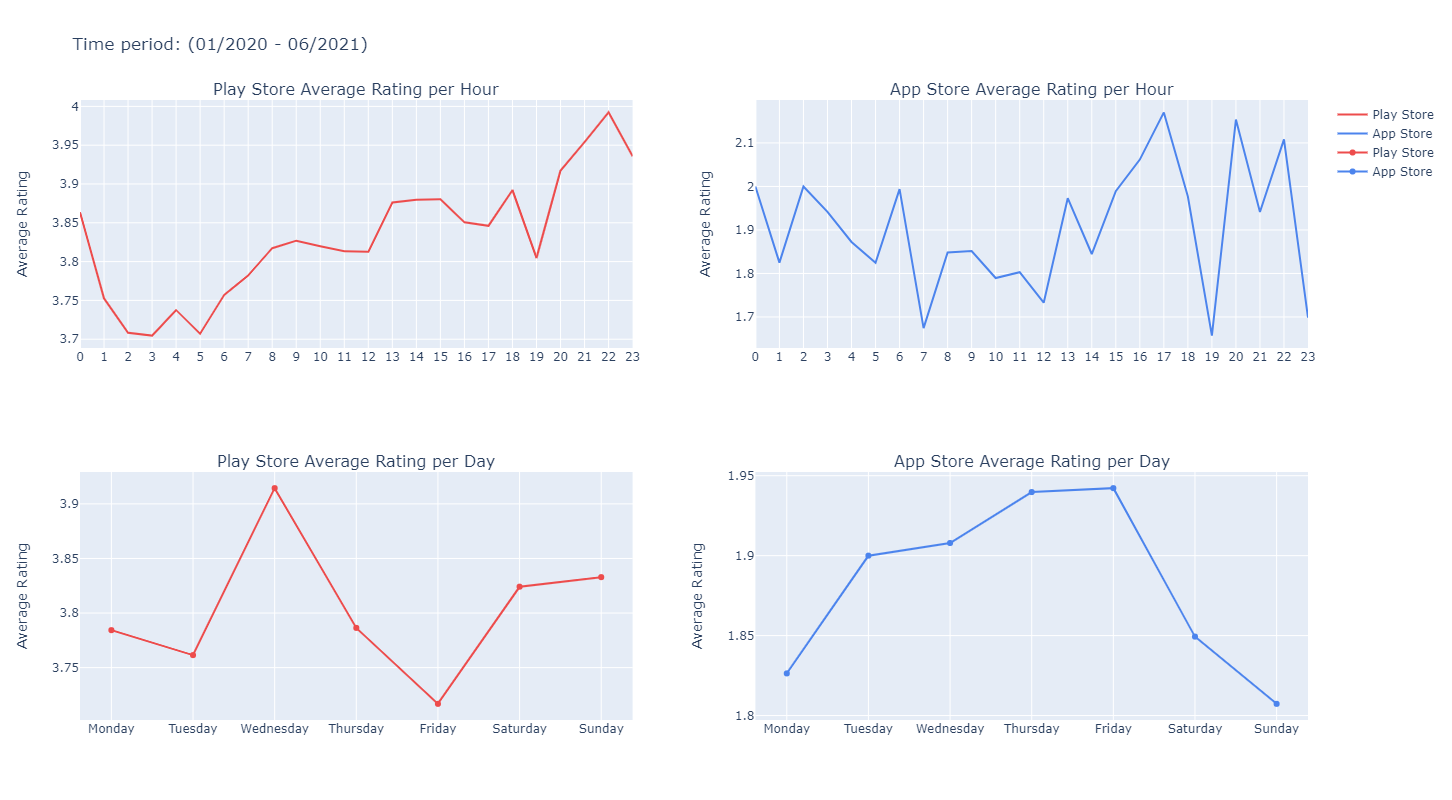

In [38]:
fig = make_subplots(
    rows=2, 
    cols=2, 
#     shared_xaxes=True,
#     shared_yaxes=True,
    vertical_spacing=0.2,
    subplot_titles=("Play Store Average Rating per Hour", "App Store Average Rating per Hour", \
                   "Play Store Average Rating per Day", "App Store Average Rating per Day")
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_hr['hour'],
        y=gps_avg_rating_hr['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_hr['hour'],
        y=as_avg_rating_hr['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_day['day'],
        y=gps_avg_rating_day['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_day['day'],
        y=as_avg_rating_day['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)

fig.update_layout(title_text="Time period: (01/2020 - 06/2021)", width=1450, height=800)
# Update yaxis and xaxis properties
fig.update_yaxes(title_text="Average Rating")
fig.update_xaxes(dtick=1)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1700, height=800)

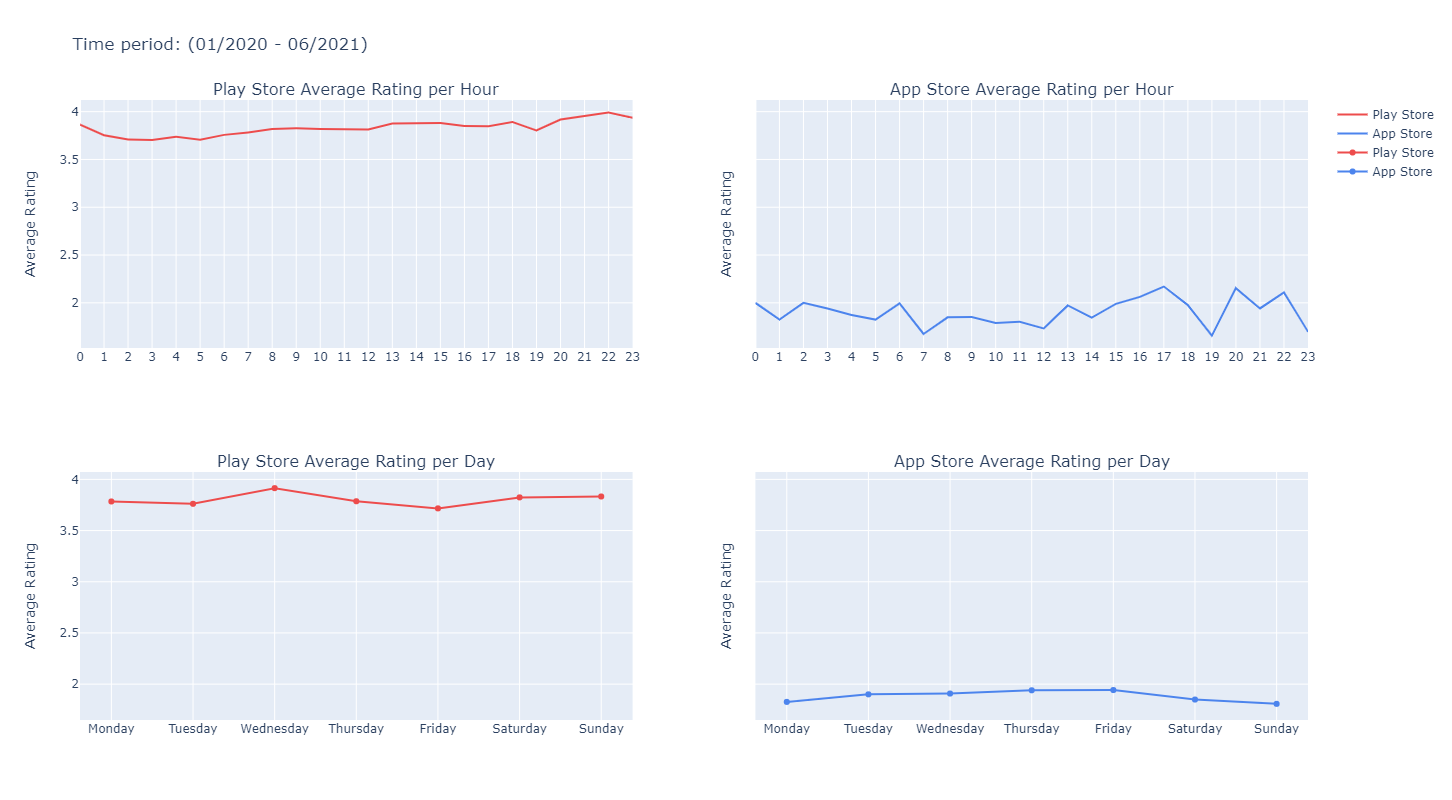

In [39]:
fig = make_subplots(
    rows=2, 
    cols=2, 
#     shared_xaxes=True,
    shared_yaxes=True,
    vertical_spacing=0.2,
    subplot_titles=("Play Store Average Rating per Hour", "App Store Average Rating per Hour", \
                   "Play Store Average Rating per Day", "App Store Average Rating per Day")
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_hr['hour'],
        y=gps_avg_rating_hr['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_hr['hour'],
        y=as_avg_rating_hr['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_day['day'],
        y=gps_avg_rating_day['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_day['day'],
        y=as_avg_rating_day['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)

fig.update_layout(title_text="Time period: (01/2020 - 06/2021)", width=1450, height=800)
# Update yaxis and xaxis properties
fig.update_yaxes(title_text="Average Rating")
fig.update_xaxes(dtick=1)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1700, height=800)


Mean word count: 8.829232879640847


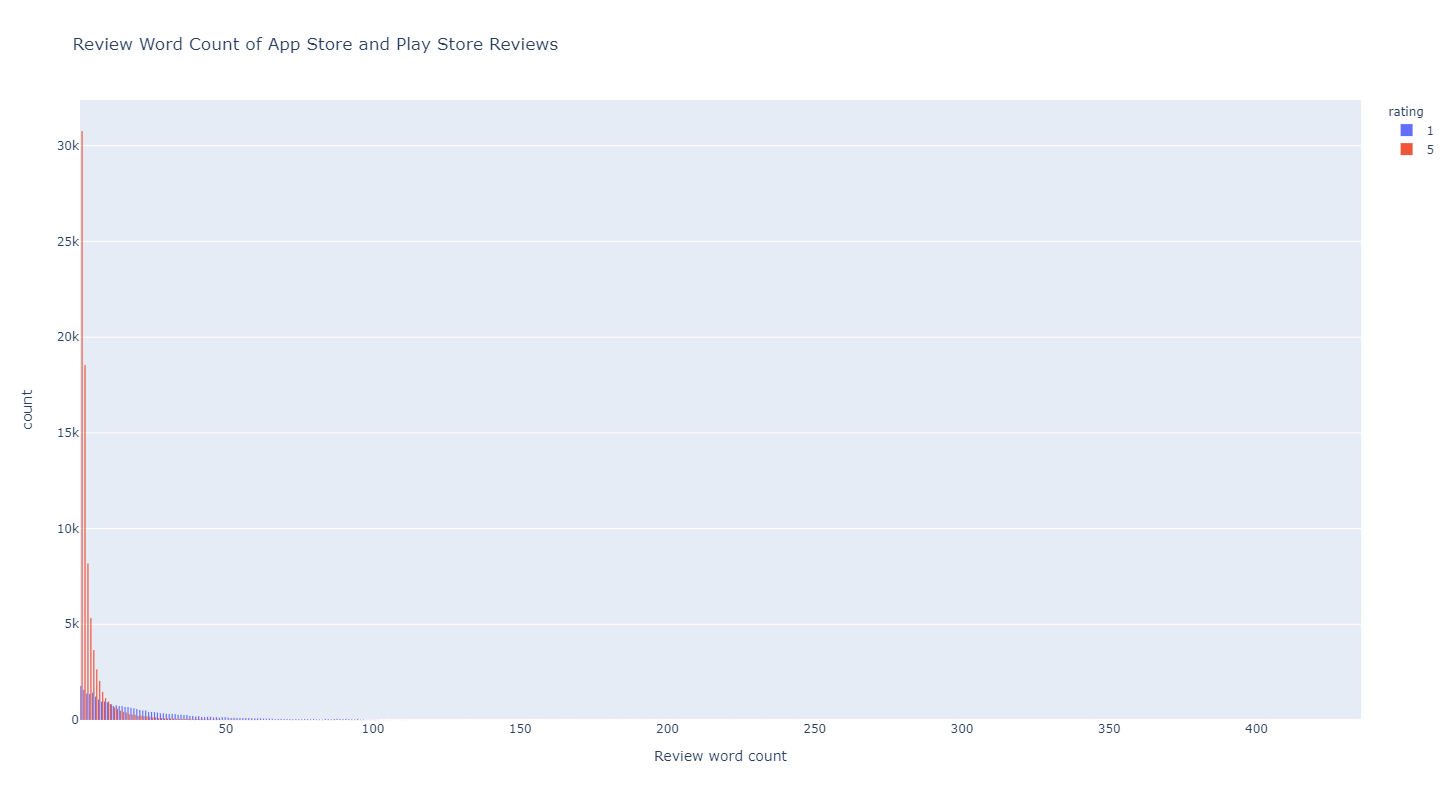

In [40]:
# init empty DF
cx = pd.DataFrame()

# Collect and store all App Store reviews in a temporary DF
cx = combined_df
cx['Review word count'] = cx['review'].str.split().str.len()
print(f"\nMean word count: {cx['Review word count'].mean()}")

fig = px.histogram(
    cx, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of App Store and Play Store Reviews',
    barmode='group',
    width=1000, 
    height=500
)

fig.update_layout(width=1450, height=800)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1000, height=500)

### Play Store

Total number of Play Store reviews: 110595
Total number of 1-star Play Store reviews: 29102
Total number of 5-star Play Store reviews: 81493

Play Store reviews mean word count: 8.428898232288983
1-star reviews mean word count: 20.143735825716444
5-star reviews mean word count: 4.245407581019228


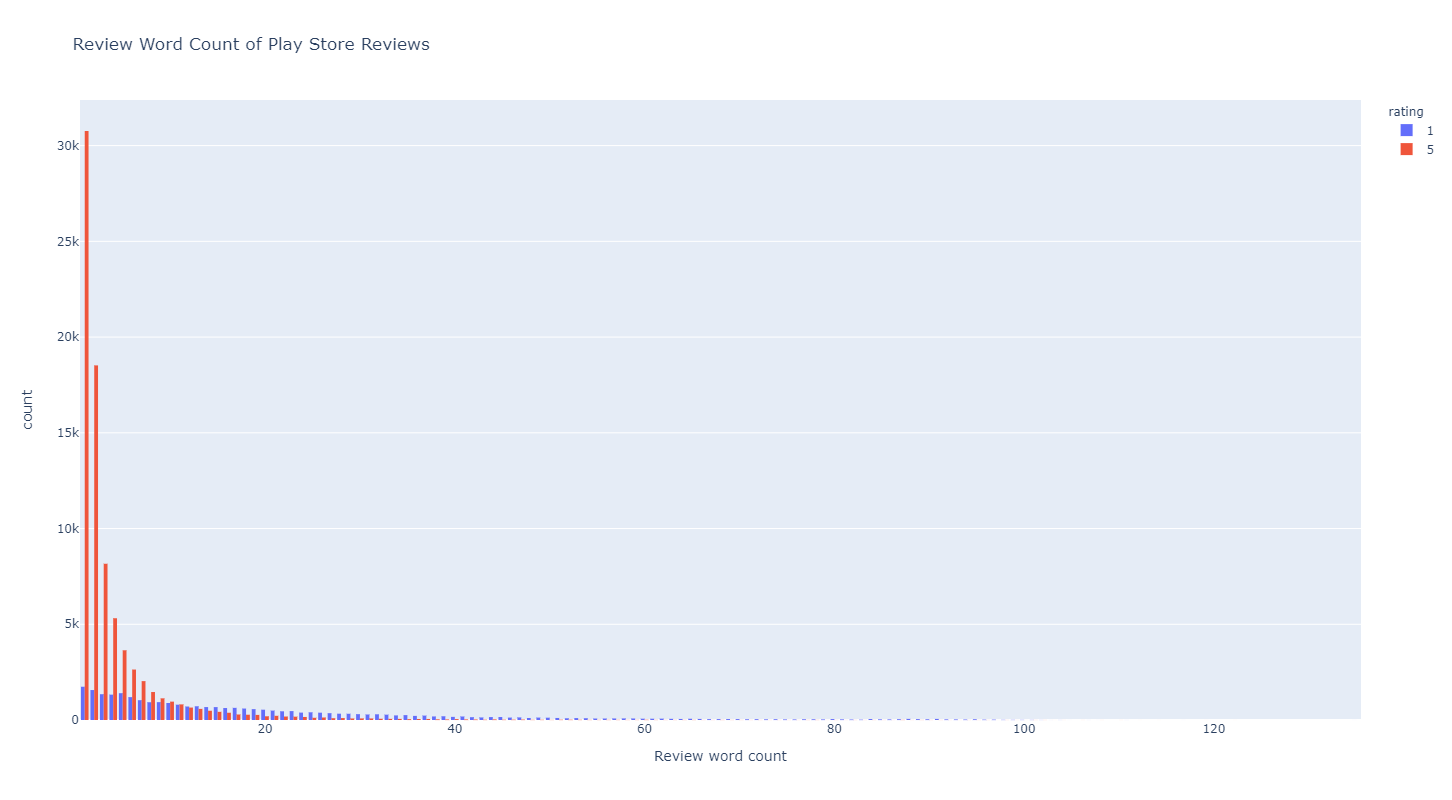

In [43]:
ax = combined_df.loc[(combined_df['type'] == 'play store')]
ax_ct = ax['review'].count()
ax_1_ct = ax_1['review'].count()
ax_5_ct = ax_5['review'].count()

print(f'Total number of Play Store reviews: {ax_ct}')
print(f'Total number of 1-star Play Store reviews: {ax_1_ct}')
print(f'Total number of 5-star Play Store reviews: {ax_5_ct}')

ax['Review word count'] = ax['review'].str.split().str.len()
ax_1['Review word count'] = ax_1['review'].str.split().str.len()
ax_5['Review word count'] = ax_5['review'].str.split().str.len()
print(f"\nPlay Store reviews mean word count: {ax['Review word count'].mean()}")
print(f"1-star reviews mean word count: {ax_1['Review word count'].mean()}")
print(f"5-star reviews mean word count: {ax_5['Review word count'].mean()}")

fig = px.histogram(
    ax, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of Play Store Reviews',
    barmode='group'
)

fig.update_layout(width=1450, height=800)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1000, height=500)

### App Store

Total number of App Store reviews: 1669
Total number of 1-star App Store reviews: 1484
Total number of 5-star App Store reviews: 185

App Store reviews mean word count: 35.35710005991612
1-star reviews mean word count: 35.88611859838275
5-star reviews mean word count: 31.113513513513514


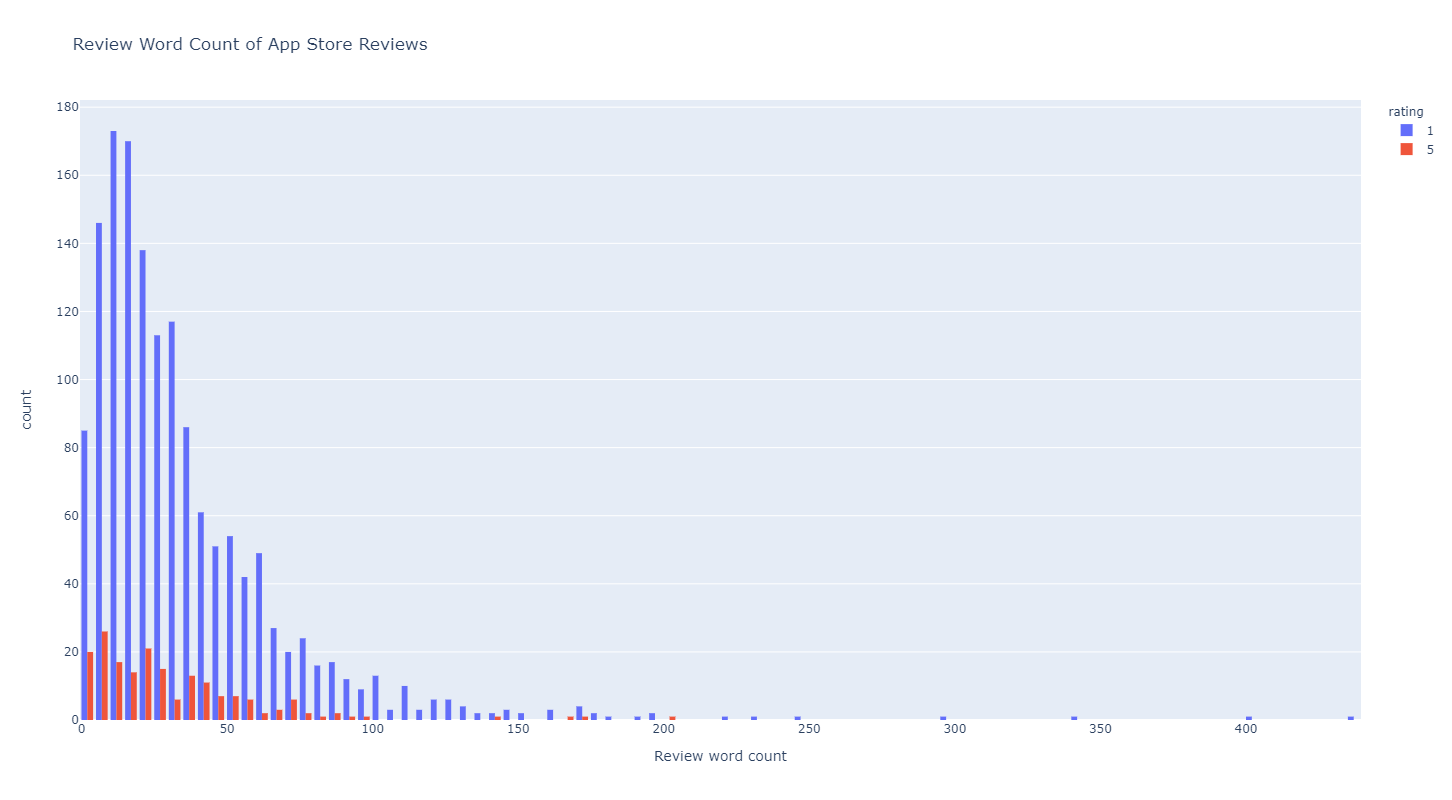

In [45]:
bx = combined_df.loc[(combined_df['type'] == 'app store')]
bx_ct = bx['review'].count()
bx_1_ct = bx_1['review'].count()
bx_5_ct = bx_5['review'].count()

print(f'Total number of App Store reviews: {bx_ct}')
print(f'Total number of 1-star App Store reviews: {bx_1_ct}')
print(f'Total number of 5-star App Store reviews: {bx_5_ct}')

bx['Review word count'] = bx['review'].str.split().str.len()
bx_1['Review word count'] = bx_1['review'].str.split().str.len()
bx_5['Review word count'] = bx_5['review'].str.split().str.len()
print(f"\nApp Store reviews mean word count: {bx['Review word count'].mean()}")
print(f"1-star reviews mean word count: {bx_1['Review word count'].mean()}")
print(f"5-star reviews mean word count: {bx_5['Review word count'].mean()}")

fig = px.histogram(
    bx, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of App Store Reviews',
    barmode='group',
    width=1000, 
    height=500
)

fig.update_layout(width=1450, height=800)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png", width=1000, height=500)

## Convert plain text to bag-of-words (BOW)
---

In [ ]:
import re
import nltk
import spacy 
import advertools as adv
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import wordnet, words, stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# concatenate english and tagalog stopwords into one list
stop_words = stopwords.words('english') + list(adv.stopwords['tagalog']) + \
            ['gcash', 'could', 'doe', 'might', 'must', 'need', 'sha', \
             'would', 'far', 'nag', 'already', 'always', 'app', 'cant', \
             'dont', 'even', 'get', 'please', 'say', 'still', 'try', 'use', \
             'yung', 'day', 'keep', 'lang', 'like', 'make', 'nyo', 'the', 'to', \
             'ive', 'naman', 'one', 'take', 'fully', 'also', 'app..', \
             'give', 'much', 'okay', 'pag', 'sana', 'star', 'sya', 'thank', \
             'usefull', 'verry', 'wala', 'want', 'way', 'well', 'wow', 'didnt', \
             'every', 'guy', 'hope', 'kayo', 'know', 'let', 'link', 'mag', 'many', \
             'message', 'never', 'nothing', 'open', 'put', 'really', 'seem', 'start', \
             'thing', 'whenever', 'wont', 'wrong', 'yet', 'almost', 'anymore', 'back', \
             'come', 'doesnt', 'especially', 'everytime', 'first', 'globe', 'last', \
             'month', 'new', 'niyo', 'since', 'something', 'think', 'thru', 'ung', \
             'without', 'suppose', 'tapos', 'another', 'anything', 'u', 'thats', \
             'via', 'etc', 'everything', 'everywhere', 'find', 'io', 'life', \
             'list', 'lot', 'maybe', 'meter', 'next' , 'past', 'phone', 'pls', \
             'plus', 'point', 'pwede', 'see', 'show', 'sometimes', 'team', 'whats', \
             'wish', 'year', 'gamitin', 'girl', 'hand', 'happen', 'hello', 'high', \
             'however', 'hurt', 'though', 'true', 'usually', 'screen', 'soon', 'acc', \
             'add', 'yun', 'yes', 'youre', 'coz', 'acct', 'agad', 'line', 'long', 'today', \
             'go', 'abd', 'kna', 'luv', 'kna', 'god', 'wlang', 'yeah', 'id', 'idk', 'iam', \
            'ill', 'ina', 'padin', 'kahit', 'pede', 'nang', 'supper', 'khit', 'kahit']

# Helper function to lemmatize with part of speech (POS) tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

token_pattern = re.compile(r"(?u)\b\w\w+\b")

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(doc) if len(word) >= 3 and re.match("[a-z].*", word) and re.match(token_pattern, word)]

### Tokenize and lemmatize review data

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

main_df = combined_df.loc[(combined_df['rating'] == 1) & (combined_df['type'] == 'app store')]

# split data to training (70%), validation (15%), and test (15%) datasets
train_data, val_data = train_test_split(main_df, train_size=0.7, random_state=42)
train_data, test_data = train_test_split(train_data, train_size=0.7, random_state=42) 

print(f'Training, validation, and test data shapes:\n{train_data.shape}')
print(val_data.shape)
print(test_data.shape)

# complete_batch = main_df.review.values.tolist()
first_batch = train_data.review.values.tolist()
second_batch = val_data.review.values.tolist()
third_batch = test_data.review.values.tolist()

vocab_size = 1000

print('\nTokenizing and counting, this may take a few minutes...')
start_time = time.time()
vectorizer = TfidfVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
#     max_features=vocab_size, 
    ngram_range=(2, 3),
    max_df=0.95, # maximum document frequency of 95% of documents
    min_df=2 # minimum document frequency of 2 documents
)

# Learn the vocabulary dictionary from the training data and return a document-term matrix
train_vectors = vectorizer.fit_transform(first_batch)
vocab_map = vectorizer.vocabulary_
vocab_list = vectorizer.get_feature_names()
removed_words = vectorizer.get_stop_words()
vocab_size = len(vocab_list)

# Extract token counts out of validation and test datasets using the vocabulary fitted with fit 
val_vectors = vectorizer.transform(second_batch)
test_vectors = vectorizer.transform(third_batch)

# complete_vectors = vectorizer.transform(complete_batch)

print(f'\nTraining rows, vocab length:\n{train_vectors.shape}')
print('\nVocab size:', vocab_size)
print(f'\nVocab list:\n{vocab_list}')
print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))

### Sort mapping of terms to feature indices.

In [ ]:
vocab_map_items = vocab_map.items()
sorted_vocab_items = sorted(vocab_map_items)

aux_lst = []

for i in range(len(sorted_vocab_items)):
    aux_lst.append(sorted_vocab_items[i][0])

### Store in a text file

In [ ]:
with open(f'data/vocab.txt', 'w') as f:
    for item in aux_lst:
        f.write("%s\n" % item)

### Verify results
---

### Training

In [ ]:
print(f'\noriginal text:')
for i in range(5):
    print(f'\n{[i]} - {train_data.review.values.tolist()[i]}')

In [ ]:
import random 

value = random.randrange(0, 4)
# value = 0
print(f'index: {value}')
print(f'\noriginal text:\n{train_data.review.values.tolist()[value]}')
print(f'\nvectorized text:\n{train_vectors[value].todense()}')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

train_counts = pd.DataFrame(
    train_vectors[:5].toarray(),
    columns=vocab_list
)

train_counts

### Validation

In [ ]:
print(f'\noriginal text:')
for i in range(5):
    print(f'\n{[i]} - {val_data.review.values.tolist()[i]}')

In [ ]:
value = random.randrange(0, 4)

print(f'index: {value}')
print(f'\noriginal text:\n{val_data.review.values.tolist()[value]}')
print(f'\nvectorized text:\n{val_vectors[value].todense()}')

In [ ]:
val_counts = pd.DataFrame(
    val_vectors[:5].toarray(),
    columns=vocab_list
)

val_counts

### Type-cast input data to np.float32 since all the params (i.e. weights and biases) in the NTM model will also follow that format
This is a more optimal approach as opposed to repeatedly type-casting during mini-batch training

In [ ]:
import scipy.sparse as sparse

train_vectors = sparse.csr_matrix(train_vectors, dtype=np.float32)
val_vectors = sparse.csr_matrix(val_vectors, dtype=np.float32)
test_vectors = sparse.csr_matrix(test_vectors, dtype=np.float32)
# complete_vectors = sparse.csr_matrix(complete_vectors, dtype=np.float32)

print(f'index = {value}\n')
print(type(train_vectors), train_vectors.dtype)
print(train_vectors[value])
print(type(val_vectors), val_vectors.dtype)
print(val_vectors[value])
print(type(test_vectors), test_vectors.dtype)
print(test_vectors[value])
# print(type(complete_vectors), complete_vectors.dtype)
# print(complete_vectors[value])

### Convert data into RecordIO Protobuf format using the SageMaker Python API and store everything in S3

In [ ]:
import scipy

# convert sparse CSR matrices to numpy arrays
train_vectors = scipy.sparse.csr_matrix.toarray(train_vectors)
val_vectors = scipy.sparse.csr_matrix.toarray(val_vectors)
test_vectors = scipy.sparse.csr_matrix.toarray(test_vectors)
# complete_vectors = scipy.sparse.csr_matrix.toarray(complete_vectors)

In [ ]:
import io
import boto3
import sagemaker
import datetime as dt
import sagemaker.amazon.common as smac

sesh = sagemaker.Session()
prefix = "sagemaker/regalado"
bucket = sesh.default_bucket()
curr_dtime = time.strftime("%Y%m%d-%H%M%S")

def convAndStore(dtype, key, vectors):
    # convert data to a recordIO-wrapped protobuf format used by the Amazon SageMaker algorithms
    key = str(key)
    
    # init memory buffer in RAM where data will be written
    buf = io.BytesIO()

    # write train data (numpy array) into a dense tensor 
    # smac.write_numpy_to_dense_tensor(buf, X_train.astype("float32"), y_train.astype("float32"))
    smac.write_numpy_to_dense_tensor(buf, vectors)

    # sets the file's current position at the offset (0)
    # i.e. set the reference point to the beginning of the memory buffer
    buf.seek(0)

    # upload to s3
    boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, dtype, key)).upload_fileobj(buf)
    
    s3_data = f"s3://{bucket}/{prefix}/{dtype}/{key}"
    
    print(f"Uploaded {dtype} data at: {s3_data}")
    
    return s3_data
    
s3_train_data = convAndStore('train', curr_dtime, train_vectors)
s3_valid_data = convAndStore('valid', curr_dtime, val_vectors)
s3_test_data = convAndStore('test', curr_dtime, test_vectors)

### Upload vocab file to s3

In [ ]:
s3_aux_path = sesh.upload_data(path=f'data/vocab.txt', key_prefix=prefix + '/input/auxiliary')
s3_aux_path

### Configure TrainingInput objects to use the training, validation, and test datasets that were uploaded to S3 

In [ ]:
from sagemaker.session import TrainingInput

s3_train = TrainingInput(s3_train_data, distribution='FullyReplicated') # set distribution='ShardedByS3Key' if using multiple EC2 instances
s3_valid = TrainingInput(s3_valid_data) 
s3_test = TrainingInput(s3_test_data) 

## Model training
---

### Set credentials

In [ ]:
from sagemaker import tuner
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve

role = get_execution_role()
region = boto3.Session().region_name    
container = retrieve('ntm', region)
client = boto3.Session().client('sagemaker')
output_prefix = os.path.join(prefix, 'output')
output_path = os.path.join('s3://', bucket, output_prefix)

In [ ]:
!pip install 'sagemaker[local]' --upgrade

In [ ]:
!sudo service docker restart

### Initialize Estimator object

In [ ]:
ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance
    output_path=output_path,
    sagemaker_session=sesh
)

In [ ]:
num_topics = 4

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    sub_sample=0.2,
    batch_norm=True
)

## Automatic Hyperparameter Tuning
---

In [ ]:
hyperparameter_ranges = {
    'weight_decay': tuner.ContinuousParameter(0.1, 1.0),
    'mini_batch_size': tuner.IntegerParameter(16, 2048),
    'learning_rate': tuner.ContinuousParameter(1e-4, 0.1),
    'rescale_gradient': tuner.ContinuousParameter(0.1, 1.0),
    'optimizer': tuner.CategoricalParameter(['sgd', 'adam', 'adadelta']),
    'encoder_layers_activation': tuner.CategoricalParameter(['sigmoid', 'tanh', 'relu'])
}

objective_metric_name = 'validation:total_loss'

In [ ]:
hyperparameter_tuner = tuner.HyperparameterTuner(
    ntm,
    objective_metric_name,
    hyperparameter_ranges, 
    objective_type='Minimize',
    max_jobs=10,
    max_parallel_jobs=5
)

In [ ]:
hyperparameter_tuner.fit(
    {"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path},
    include_cls_metadata=False,
    wait=False
)

job_name = hyperparameter_tuner.latest_tuning_job.job_name

response = client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=job_name
)

response['HyperParameterTuningJobStatus']

In [ ]:
from pprint import pprint

pprint(response)

In [ ]:
hyperparameter_tuner.__dict__

In [ ]:
tuning_job_name = response['HyperParameterTuningJobName']
%store tuning_job_name

tuning_job_name

In [ ]:
from time import sleep

while response['HyperParameterTuningJobStatus'] == 'InProgress':
    response = client.describe_hyper_parameter_tuning_job(
        HyperParameterTuningJobName=job_name
    )

    print(response['HyperParameterTuningJobStatus'])
    sleep(60)

In [ ]:
%store -r tuning_job_name

from sagemaker import HyperparameterTuningJobAnalytics

def latest_df():
    analytics = HyperparameterTuningJobAnalytics(tuning_job_name)

    return analytics.dataframe()    

latest_df().sort_values('FinalObjectiveValue', ascending=True)

## Retrain model with the best hyperparameter values to instantiate an Estimator object required to deploy a SageMaker endpoint
---

## 1-star Play Store model
---

In [ ]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

# Best config ~ ~ ~ ~ ~ ~ 
# 'mini_batch_size': '1849', 'epochs': '100', 'encoder_layers_activation': 'relu', 'optimizer': 'adam', 'tolerance': '0.001', 'num_patience_epochs': '5', 'batch_norm': 'True', 'rescale_gradient': '0.840547', 
# 'clip_gradient': 'Inf', 'weight_decay': '0.133406', 'learning_rate': '0.008494', 'sub_sample': '1.0', '_tuning_objective_metric': '', '_data_format': 'record', '_num_gpus': 'auto', '_num_kv_servers': 'auto', 
# '_kvstore': 'auto_gpu', 'feature_dim': '1000', 'num_topics': '4'

num_topics = 4

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    num_patience_epochs=5,
    epochs=100, 
    batch_norm=True,
#     sub_sample=0.2,
    encoder_layers_activation='relu',
    learning_rate=0.008494,
    mini_batch_size=1849,
    optimizer='adam',
    rescale_gradient=0.840547,
    weight_decay=0.133406
)

In [ ]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

In [ ]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

## Deploy endpoint
---

In [ ]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

## Perform sample inferences
---

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 1000

# 1-star Play Store
topics = ['account issues (i.e. user registration, verification errors, mpin login issues)', \
          'app issues (i.e. update, version, installation)', 'user experience and customer support', 'functionality issues (i.e. rebates, promos, load, credit)']

predictor = sagemaker.predictor.Predictor(
    endpoint_name='ntm-2021-06-30-03-43-49-712', 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

In [46]:
results = {'predictions': [{'topic_weights': [0.2484152317, 0.2467778176, 0.2623752058, 0.24243173]}, {'topic_weights': [0.1402768046, 0.1755613238, 0.177385062, 0.5067768097]}, {'topic_weights': [0.2037471682, 0.3024327457, 0.273671627, 0.220148474]}, {'topic_weights': [0.4645462036, 0.1783829927, 0.1789411455, 0.1781295985]}, {'topic_weights': [0.5587870479, 0.1172932833, 0.1275965571, 0.1963231713]}, {'topic_weights': [0.2578158975, 0.2437610626, 0.2637999356, 0.2346231043]}, {'topic_weights': [0.218617633, 0.2429761291, 0.2481111884, 0.2902950644]}, {'topic_weights': [0.3455783725, 0.2141677737, 0.2198166847, 0.2204371244]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2056983858, 0.2132900804, 0.2264955491, 0.3545159996]}, {'topic_weights': [0.2655858397, 0.2646178007, 0.2527343631, 0.2170619667]}, {'topic_weights': [0.524503231, 0.1461608708, 0.1622655541, 0.1670703739]}, {'topic_weights': [0.3064722121, 0.2328756452, 0.2396468222, 0.2210053504]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.1848131269, 0.139298141, 0.1440681666, 0.5318205953]}, {'topic_weights': [0.2493535727, 0.2614301145, 0.261626631, 0.2275896817]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.4377196431, 0.1835173666, 0.1956115812, 0.1831514686]}, {'topic_weights': [0.3024511039, 0.1925174594, 0.1837663352, 0.3212651014]}, {'topic_weights': [0.3297323585, 0.2200671136, 0.2307699919, 0.2194305509]}, {'topic_weights': [0.2194734961, 0.262357682, 0.2655174732, 0.2526513338]}, {'topic_weights': [0.4081066549, 0.1926156878, 0.208372876, 0.1909047365]}, {'topic_weights': [0.2320827842, 0.249199599, 0.2667281032, 0.2519894838]}, {'topic_weights': [0.2457514852, 0.2514012456, 0.2594071627, 0.2434401065]}, {'topic_weights': [0.2741829753, 0.2386623472, 0.2555823922, 0.2315722704]}, {'topic_weights': [0.2325957566, 0.2519785464, 0.2625337839, 0.2528918982]}, {'topic_weights': [0.3902633786, 0.1991356462, 0.2111490518, 0.1994520128]}, {'topic_weights': [0.2271969765, 0.2754018903, 0.2632803619, 0.2341208309]}, {'topic_weights': [0.2616057396, 0.2443290949, 0.2571837604, 0.2368813604]}, {'topic_weights': [0.3298635483, 0.2341933399, 0.2346110791, 0.201331988]}, {'topic_weights': [0.2244489938, 0.3002018332, 0.2683464587, 0.2070026696]}, {'topic_weights': [0.5273493528, 0.0980281457, 0.1065598875, 0.2680626512]}, {'topic_weights': [0.5738031864, 0.1403283477, 0.1440270394, 0.1418414116]}, {'topic_weights': [0.1517407149, 0.1451147795, 0.1445838064, 0.5585606694]}, {'topic_weights': [0.2442577034, 0.2667500079, 0.2576238215, 0.2313685417]}, {'topic_weights': [0.3677336574, 0.1804666817, 0.1941506118, 0.2576489449]}, {'topic_weights': [0.1858982891, 0.3319505751, 0.281018436, 0.2011326849]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2398866564, 0.258720547, 0.2472030818, 0.2541896999]}, {'topic_weights': [0.2442480922, 0.2567093968, 0.2467631698, 0.2522793412]}, {'topic_weights': [0.3193024099, 0.2578867078, 0.2413105071, 0.1815003455]}, {'topic_weights': [0.205059886, 0.2779440582, 0.2689985335, 0.2479975224]}, {'topic_weights': [0.2173079997, 0.2643330991, 0.2631031275, 0.2552557886]}, {'topic_weights': [0.1858864278, 0.1369818896, 0.1319989562, 0.5451326966]}, {'topic_weights': [0.264405787, 0.248650685, 0.2413937747, 0.2455497235]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.3984538019, 0.1579367667, 0.1745704561, 0.2690389752]}, {'topic_weights': [0.1940823793, 0.337634325, 0.2619127333, 0.2063705921]}, {'topic_weights': [0.2699657977, 0.2441103309, 0.2464409769, 0.2394829392]}, {'topic_weights': [0.1748744547, 0.2089394927, 0.2062456608, 0.409940362]}, {'topic_weights': [0.2109508514, 0.2542781234, 0.2638650537, 0.2709060013]}, {'topic_weights': [0.1748744547, 0.2089394927, 0.2062456608, 0.409940362]}, {'topic_weights': [0.2659409344, 0.2553616166, 0.2547462881, 0.2239512056]}, {'topic_weights': [0.4054379761, 0.1923330724, 0.2068566531, 0.1953722984]}, {'topic_weights': [0.4391652644, 0.1203567088, 0.1241214946, 0.3163565993]}, {'topic_weights': [0.1864286661, 0.2528719604, 0.2491165102, 0.3115828633]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.257689178, 0.2437414676, 0.2640024424, 0.2345669121]}, {'topic_weights': [0.3014738262, 0.2394906133, 0.2438032925, 0.2152322531]}, {'topic_weights': [0.2071903944, 0.2591623962, 0.2633088529, 0.2703383565]}, {'topic_weights': [0.239649713, 0.1746955514, 0.1789131165, 0.4067416489]}, {'topic_weights': [0.5601267815, 0.1638501883, 0.1597934514, 0.1162295789]}, {'topic_weights': [0.4183260202, 0.1947141886, 0.1928848773, 0.1940749288]}, {'topic_weights': [0.2831617594, 0.2387333959, 0.2433717102, 0.2347331196]}, {'topic_weights': [0.1916377246, 0.1770131141, 0.1713583022, 0.4599908888]}, {'topic_weights': [0.2855750918, 0.2356303185, 0.2486503273, 0.2301443219]}, {'topic_weights': [0.2263158411, 0.2591023445, 0.2629356384, 0.2516461611]}, {'topic_weights': [0.246455729, 0.2592150271, 0.2364760488, 0.25785321]}, {'topic_weights': [0.1905355901, 0.2651931047, 0.2491015643, 0.2951697111]}, {'topic_weights': [0.3905375004, 0.1431420147, 0.1529687047, 0.3133517504]}, {'topic_weights': [0.2210504562, 0.1957634836, 0.1891918778, 0.3939941525]}, {'topic_weights': [0.4070315659, 0.1965068877, 0.2072878778, 0.1891736984]}, {'topic_weights': [0.1641495079, 0.3801212907, 0.2795723975, 0.1761567295]}, {'topic_weights': [0.2795256078, 0.2438763082, 0.2339140624, 0.2426839769]}, {'topic_weights': [0.2660015225, 0.2513564825, 0.231409803, 0.2512322366]}, {'topic_weights': [0.5168460011, 0.1568206847, 0.1722797602, 0.1540535539]}, {'topic_weights': [0.3227885067, 0.1527541131, 0.161098659, 0.3633587658]}, {'topic_weights': [0.3266691864, 0.2261300683, 0.2339813411, 0.2132193744]}, {'topic_weights': [0.2708789706, 0.2448690683, 0.2537907362, 0.2304612696]}, {'topic_weights': [0.4275859296, 0.1871459186, 0.1985492855, 0.1867188811]}, {'topic_weights': [0.3122467995, 0.2322541624, 0.2521410286, 0.2033579648]}, {'topic_weights': [0.5935701132, 0.1330766082, 0.1394253224, 0.1339280158]}, {'topic_weights': [0.4112661183, 0.2136139423, 0.2024240196, 0.1726959497]}, {'topic_weights': [0.2875720859, 0.2095374763, 0.2233959734, 0.2794944644]}, {'topic_weights': [0.2386298776, 0.2562066615, 0.2559760213, 0.2491874546]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2889198363, 0.1553335786, 0.1727181077, 0.3830284774]}, {'topic_weights': [0.243023634, 0.2573517263, 0.2466662526, 0.2529584467]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2876066566, 0.2877922356, 0.2474623919, 0.177138716]}, {'topic_weights': [0.3018339872, 0.1945905536, 0.2099585533, 0.2936168313]}, {'topic_weights': [0.301284194, 0.2293094546, 0.2459589392, 0.2234473526]}, {'topic_weights': [0.2369162887, 0.2280832976, 0.220086053, 0.3149143755]}, {'topic_weights': [0.2709397078, 0.2453805357, 0.2415573001, 0.2421224266]}, {'topic_weights': [0.2068240196, 0.2171638459, 0.2200509757, 0.355961144]}, {'topic_weights': [0.246982038, 0.2546917498, 0.2486195862, 0.249706611]}, {'topic_weights': [0.2543533742, 0.251919806, 0.2461504936, 0.2475763261]}, {'topic_weights': [0.257689178, 0.2437414676, 0.2640024424, 0.2345669121]}, {'topic_weights': [0.2020142972, 0.1970495135, 0.202124849, 0.3988113701]}, {'topic_weights': [0.3117049038, 0.2278825343, 0.2368359119, 0.2235766351]}, {'topic_weights': [0.2625776231, 0.2449900806, 0.2540693581, 0.2383630127]}, {'topic_weights': [0.2533817887, 0.2473965287, 0.2599533498, 0.2392683178]}, {'topic_weights': [0.1967911273, 0.3643198013, 0.2612935603, 0.1775954664]}, {'topic_weights': [0.2351810485, 0.2607264519, 0.2596720159, 0.2444204539]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.2435573637, 0.2534380257, 0.256827414, 0.2461771965]}, {'topic_weights': [0.3101130426, 0.2270409316, 0.2316293567, 0.2312166691]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.3445340097, 0.2205578834, 0.2133428454, 0.2215652466]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.0948613808, 0.0912691578, 0.0897823125, 0.7240871191]}, {'topic_weights': [0.321284622, 0.3008997738, 0.2257022709, 0.1521133035]}, {'topic_weights': [0.2074289769, 0.2794138491, 0.2708507776, 0.2423064113]}, {'topic_weights': [0.2474649251, 0.2575411201, 0.2617492974, 0.2332446575]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3613238335, 0.2190078944, 0.2298625857, 0.1898057759]}, {'topic_weights': [0.2563431561, 0.2460592538, 0.2595828176, 0.2380147576]}, {'topic_weights': [0.257689178, 0.2437414676, 0.2640024424, 0.2345669121]}, {'topic_weights': [0.1922905147, 0.1846211404, 0.1930848211, 0.4300035834]}, {'topic_weights': [0.268566668, 0.2421499044, 0.2537316084, 0.2355518192]}, {'topic_weights': [0.2826237977, 0.235189721, 0.2534150481, 0.2287714183]}, {'topic_weights': [0.45016855, 0.1805686057, 0.1890842468, 0.1801787019]}, {'topic_weights': [0.2472064644, 0.2431832999, 0.2635691464, 0.246041134]}, {'topic_weights': [0.2979170382, 0.2250484526, 0.2434213012, 0.2336132228]}, {'topic_weights': [0.2730429769, 0.2020819038, 0.2018608749, 0.3230142295]}, {'topic_weights': [0.2577486634, 0.2454516143, 0.2593352795, 0.2374644578]}, {'topic_weights': [0.253494978, 0.2476220727, 0.259188205, 0.2396947145]}, {'topic_weights': [0.2401181459, 0.2574982345, 0.2503175735, 0.2520660758]}, {'topic_weights': [0.2899627984, 0.1825768799, 0.2009780705, 0.3264822662]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2747463882, 0.2420525998, 0.2456231415, 0.2375778258]}, {'topic_weights': [0.2679784, 0.2476458997, 0.2588851154, 0.2254905701]}, {'topic_weights': [0.2423818409, 0.2371107936, 0.2335611582, 0.2869462073]}, {'topic_weights': [0.2601304054, 0.2224948257, 0.2246960849, 0.292678684]}, {'topic_weights': [0.2731949091, 0.2423545718, 0.24887456, 0.2355759293]}, {'topic_weights': [0.2260110825, 0.2620528638, 0.2572889626, 0.2546471357]}, {'topic_weights': [0.2599148452, 0.2475491762, 0.2506585717, 0.2418774068]}, {'topic_weights': [0.4422725439, 0.1865221262, 0.1840304583, 0.187174812]}, {'topic_weights': [0.6280548573, 0.1198190078, 0.1285039485, 0.1236221641]}, {'topic_weights': [0.2491836697, 0.2483172268, 0.2569910288, 0.2455081046]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2472064644, 0.2431832999, 0.2635691464, 0.246041134]}, {'topic_weights': [0.2111617476, 0.2529290318, 0.2525874078, 0.2833218575]}, {'topic_weights': [0.2934930921, 0.2172376215, 0.232415393, 0.2568539381]}, {'topic_weights': [0.2639927566, 0.1798264533, 0.196186766, 0.3599940538]}, {'topic_weights': [0.2639321983, 0.2483538538, 0.2428871691, 0.244826749]}, {'topic_weights': [0.2283530086, 0.2582767606, 0.2644334435, 0.2489367276]}, {'topic_weights': [0.2406507432, 0.2505466938, 0.2624666989, 0.2463358641]}, {'topic_weights': [0.2306178361, 0.2505858839, 0.2611134648, 0.2576828301]}, {'topic_weights': [0.285236448, 0.2467693388, 0.258592397, 0.2094018012]}, {'topic_weights': [0.2815524936, 0.2456446141, 0.2259673327, 0.2468356192]}, {'topic_weights': [0.2356314808, 0.2604316771, 0.2483533025, 0.2555835545]}, {'topic_weights': [0.2771766782, 0.2374887466, 0.2547718585, 0.2305626571]}, {'topic_weights': [0.3613246679, 0.2090093642, 0.2250811905, 0.2045847625]}, {'topic_weights': [0.2404312044, 0.2552523911, 0.2561270893, 0.2481893003]}, {'topic_weights': [0.3915788233, 0.2031793147, 0.2019296438, 0.2033122629]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.307264477, 0.2219230086, 0.2404821962, 0.2303303033]}, {'topic_weights': [0.3681300879, 0.1815539896, 0.2079643309, 0.2423515618]}, {'topic_weights': [0.3680693507, 0.2231189162, 0.2270860523, 0.1817256957]}, {'topic_weights': [0.5999796987, 0.1300036311, 0.1315011829, 0.138515532]}, {'topic_weights': [0.2553563118, 0.245265469, 0.2611295581, 0.2382486612]}, {'topic_weights': [0.2639927566, 0.1798264533, 0.196186766, 0.3599940538]}, {'topic_weights': [0.3742381334, 0.1218390018, 0.1221724525, 0.3817504048]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.2297754288, 0.2607240975, 0.2557338178, 0.2537666559]}, {'topic_weights': [0.2384759635, 0.2569587827, 0.2541053891, 0.2504598796]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2645634413, 0.2356543243, 0.252756536, 0.2470256835]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.349989593, 0.2114501148, 0.230282113, 0.2082782388]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2317332327, 0.2401446849, 0.2539789677, 0.2741431296]}, {'topic_weights': [0.2425026149, 0.184649542, 0.2057064325, 0.3671413958]}, {'topic_weights': [0.266318351, 0.2503612339, 0.2494857162, 0.2338346839]}, {'topic_weights': [0.2708789706, 0.2448690683, 0.2537907362, 0.2304612696]}, {'topic_weights': [0.2162470073, 0.2692891657, 0.2672667801, 0.247197032]}, {'topic_weights': [0.2469321191, 0.245911032, 0.2602986097, 0.2468581945]}, {'topic_weights': [0.2654396892, 0.2380839437, 0.2505522966, 0.2459240705]}, {'topic_weights': [0.2307017744, 0.2510158122, 0.2609251738, 0.2573572993]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2492404431, 0.2506506145, 0.256704241, 0.2434047014]}, {'topic_weights': [0.5522203445, 0.1206185818, 0.1360221654, 0.1911388785]}, {'topic_weights': [0.2612471282, 0.2613685727, 0.2606820464, 0.216702193]}, {'topic_weights': [0.622192502, 0.1218729168, 0.129524827, 0.1264097244]}, {'topic_weights': [0.3133633137, 0.2218737006, 0.2325908095, 0.2321722656]}, {'topic_weights': [0.2201937884, 0.2731788456, 0.2710919082, 0.2355354279]}, {'topic_weights': [0.2501348257, 0.2524107397, 0.2506182492, 0.2468362004]}, {'topic_weights': [0.2567606866, 0.2482459992, 0.2530459464, 0.2419473827]}, {'topic_weights': [0.2026705593, 0.2075257897, 0.2241934836, 0.3656101823]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2541574538, 0.2387143672, 0.2564876974, 0.2506404817]}, {'topic_weights': [0.2364005297, 0.2366896421, 0.2546621859, 0.2722476423]}, {'topic_weights': [0.2161175311, 0.2680298388, 0.2544936538, 0.2613589764]}, {'topic_weights': [0.2774007916, 0.2388745099, 0.2507720292, 0.2329526991]}, {'topic_weights': [0.2265046239, 0.2733935416, 0.2671067715, 0.2329950631]}, {'topic_weights': [0.2768381238, 0.2422754765, 0.2421445101, 0.2387419343]}, {'topic_weights': [0.2800765634, 0.2412045449, 0.2407000512, 0.2380188107]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2606751621, 0.2478751689, 0.2487143576, 0.2427353263]}, {'topic_weights': [0.3278565705, 0.2254348695, 0.2250230163, 0.2216855884]}, {'topic_weights': [0.1912731677, 0.2601602077, 0.2453087419, 0.3032578528]}, {'topic_weights': [0.2697006762, 0.2418599725, 0.2529933453, 0.2354459465]}, {'topic_weights': [0.2032675743, 0.2521826029, 0.2371275276, 0.3074222803]}, {'topic_weights': [0.35208565, 0.1589470655, 0.1669453681, 0.322021842]}, {'topic_weights': [0.2605346739, 0.24174501, 0.258143276, 0.2395770997]}, {'topic_weights': [0.2264776528, 0.2621035278, 0.2564973235, 0.2549214959]}, {'topic_weights': [0.1538566947, 0.2249546647, 0.2233256698, 0.3978630304]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2737731636, 0.2382111847, 0.2574273348, 0.2305883169]}, {'topic_weights': [0.2639927566, 0.1798264533, 0.196186766, 0.3599940538]}, {'topic_weights': [0.2006124258, 0.3251260221, 0.2712440789, 0.2030174583]}, {'topic_weights': [0.2704431415, 0.2429235727, 0.2490717173, 0.2375615388]}, {'topic_weights': [0.14974159, 0.1332937032, 0.1343932003, 0.5825715065]}, {'topic_weights': [0.22008048, 0.259151876, 0.2534140646, 0.2673535645]}, {'topic_weights': [0.3808204532, 0.2017057687, 0.2225505412, 0.1949233115]}, {'topic_weights': [0.2520126402, 0.2495515794, 0.2559358478, 0.2424999326]}, {'topic_weights': [0.2750273049, 0.2513616085, 0.2530589402, 0.2205521911]}, {'topic_weights': [0.2636315525, 0.2413406223, 0.2615401447, 0.2334877104]}, {'topic_weights': [0.2615938783, 0.2344050258, 0.2552393377, 0.2487617582]}, {'topic_weights': [0.2439354211, 0.241350621, 0.2604494393, 0.2542644739]}, {'topic_weights': [0.2806143463, 0.2418108284, 0.248466447, 0.2291083932]}, {'topic_weights': [0.2450854331, 0.2694857717, 0.2646222115, 0.2208065987]}, {'topic_weights': [0.2479265928, 0.2117896676, 0.2215439379, 0.3187398314]}, {'topic_weights': [0.2407789975, 0.2533103824, 0.2592603862, 0.246650219]}, {'topic_weights': [0.2774674892, 0.2374394834, 0.2545828819, 0.2305101305]}, {'topic_weights': [0.196594283, 0.338460207, 0.2647431195, 0.2002024502]}, {'topic_weights': [0.2411416173, 0.2476643175, 0.266741842, 0.2444522232]}, {'topic_weights': [0.3014738262, 0.2394906133, 0.2438032925, 0.2152322531]}, {'topic_weights': [0.2326366007, 0.2595436573, 0.2550320625, 0.2527877092]}, {'topic_weights': [0.5426424742, 0.1474757195, 0.158814922, 0.1510668099]}, {'topic_weights': [0.2602682114, 0.176420629, 0.1942038089, 0.3691073656]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2419111133, 0.2762818336, 0.2694578767, 0.2123491168]}, {'topic_weights': [0.2581781447, 0.2364221364, 0.2539974153, 0.2514023483]}, {'topic_weights': [0.321913451, 0.2245828807, 0.2354403585, 0.2180633098]}, {'topic_weights': [0.2413123697, 0.256449163, 0.2515877187, 0.2506508231]}, {'topic_weights': [0.2480980456, 0.2451093197, 0.257258594, 0.2495340705]}, {'topic_weights': [0.2535203695, 0.2061942667, 0.2162144631, 0.3240708709]}, {'topic_weights': [0.2766765654, 0.1582735032, 0.1695410609, 0.3955088258]}, {'topic_weights': [0.2326714694, 0.2561399341, 0.2643386126, 0.2468499839]}, {'topic_weights': [0.2303928882, 0.2599028647, 0.2571536899, 0.2525505126]}, {'topic_weights': [0.0956822783, 0.0913459137, 0.0877503604, 0.7252215147]}, {'topic_weights': [0.2867512107, 0.2386571318, 0.2378565967, 0.2367350608]}, {'topic_weights': [0.395963639, 0.1397364587, 0.1534531116, 0.3108468056]}, {'topic_weights': [0.6102159619, 0.1103995219, 0.1166708171, 0.1627136618]}, {'topic_weights': [0.5659363866, 0.1392991096, 0.1541036069, 0.1406608969]}, {'topic_weights': [0.2806143463, 0.2418108284, 0.248466447, 0.2291083932]}, {'topic_weights': [0.2704141736, 0.2444792539, 0.2505656183, 0.234540984]}, {'topic_weights': [0.2477867603, 0.2425061762, 0.2573539913, 0.2523530722]}, {'topic_weights': [0.2768978477, 0.2422682941, 0.2420826256, 0.2387512475]}, {'topic_weights': [0.2426345348, 0.2552618086, 0.2660217583, 0.2360818982]}, {'topic_weights': [0.366540283, 0.2087981403, 0.2303422242, 0.1943193227]}, {'topic_weights': [0.2772328556, 0.2194700986, 0.2338083386, 0.2694887519]}, {'topic_weights': [0.3052416742, 0.232388109, 0.243602708, 0.2187675089]}, {'topic_weights': [0.2355381846, 0.2556730509, 0.2616911232, 0.2470975965]}, {'topic_weights': [0.2971960902, 0.1775619835, 0.1896818727, 0.3355600834]}, {'topic_weights': [0.191939801, 0.2982713878, 0.2794701457, 0.2303186804]}, {'topic_weights': [0.2536452711, 0.2514801025, 0.2560559511, 0.2388186157]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2666140795, 0.2411617488, 0.2590315342, 0.2331926674]}, {'topic_weights': [0.284573257, 0.2304321975, 0.2490153611, 0.2359791994]}, {'topic_weights': [0.2750023603, 0.2436740547, 0.2437136173, 0.2376099825]}, {'topic_weights': [0.1990223527, 0.3222322464, 0.2722251117, 0.206520319]}, {'topic_weights': [0.2262815386, 0.1860778779, 0.1920851171, 0.395555526]}, {'topic_weights': [0.2594873607, 0.2495426685, 0.245701775, 0.245268181]}, {'topic_weights': [0.1941157728, 0.2176754028, 0.2212203145, 0.3669884801]}, {'topic_weights': [0.4285324812, 0.1881562769, 0.1966889203, 0.1866223365]}, {'topic_weights': [0.229164958, 0.2589719892, 0.2614173591, 0.2504456639]}, {'topic_weights': [0.2273202538, 0.2586355209, 0.2648725212, 0.2491717041]}, {'topic_weights': [0.2818101645, 0.236603424, 0.251151979, 0.2304344326]}, {'topic_weights': [0.4673956633, 0.1255931705, 0.1271078587, 0.2799032331]}, {'topic_weights': [0.1484946758, 0.089787133, 0.089675732, 0.6720424294]}, {'topic_weights': [0.3624489307, 0.2017450929, 0.2200551331, 0.2157509029]}, {'topic_weights': [0.2591198981, 0.2525621951, 0.2376659662, 0.2506519258]}, {'topic_weights': [0.2846838832, 0.2298735529, 0.2492542714, 0.2361882776]}, {'topic_weights': [0.2644973695, 0.2408815175, 0.2472995073, 0.2473215759]}, {'topic_weights': [0.1996269226, 0.3036616445, 0.2745608091, 0.2221505791]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.38098526, 0.2011542171, 0.2240576893, 0.1938028485]}, {'topic_weights': [0.2459402829, 0.2768184543, 0.2621742487, 0.2150669992]}, {'topic_weights': [0.7289307117, 0.0850112438, 0.0917524844, 0.0943055451]}, {'topic_weights': [0.3430690467, 0.2159167379, 0.2317755371, 0.2092386931]}, {'topic_weights': [0.5509246588, 0.146817103, 0.1584843546, 0.1437739134]}, {'topic_weights': [0.2273563445, 0.2543104291, 0.2764437199, 0.2418895215]}, {'topic_weights': [0.2223345488, 0.2968655527, 0.2678726315, 0.2129272521]}, {'topic_weights': [0.4935076833, 0.1674803495, 0.1725657284, 0.1664462388]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.4425907433, 0.1583920568, 0.1787160784, 0.2203011513]}, {'topic_weights': [0.5222885013, 0.1554840505, 0.1644997895, 0.1577276289]}, {'topic_weights': [0.3268906474, 0.2158832252, 0.2347663939, 0.2224597484]}, {'topic_weights': [0.2994150221, 0.2278765291, 0.2289857119, 0.2437226921]}, {'topic_weights': [0.2921524644, 0.234179318, 0.2442761213, 0.2293920815]}, {'topic_weights': [0.2616099715, 0.24515149, 0.253192395, 0.2400460988]}, {'topic_weights': [0.171099484, 0.3787572384, 0.2801050544, 0.1700382531]}, {'topic_weights': [0.5696060658, 0.1415064335, 0.1547988653, 0.1340886652]}, {'topic_weights': [0.2305973172, 0.2654680312, 0.2650496364, 0.2388850152]}, {'topic_weights': [0.273167491, 0.1679097563, 0.1899496466, 0.3689731061]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3761311471, 0.1489808261, 0.1493856609, 0.325502336]}, {'topic_weights': [0.2542047501, 0.2802726626, 0.2377473116, 0.2277752459]}, {'topic_weights': [0.3741406798, 0.2049247175, 0.2156274766, 0.2053071856]}, {'topic_weights': [0.2813531458, 0.2383324653, 0.2530405819, 0.2272738069]}, {'topic_weights': [0.2912966013, 0.2353038192, 0.2412581444, 0.2321414202]}, {'topic_weights': [0.2643152773, 0.2467286438, 0.246904999, 0.2420510799]}, {'topic_weights': [0.3692689836, 0.1949730068, 0.2115224302, 0.2242355645]}, {'topic_weights': [0.2641168237, 0.2657486796, 0.2564284503, 0.2137060612]}, {'topic_weights': [0.5232152939, 0.155310601, 0.1685972661, 0.1528768986]}, {'topic_weights': [0.3528666198, 0.2093582898, 0.2253905982, 0.2123844624]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.3722837865, 0.2020194083, 0.2187590748, 0.2069377005]}, {'topic_weights': [0.1988968402, 0.3203591108, 0.2739507556, 0.2067933083]}, {'topic_weights': [0.08380647, 0.0687738359, 0.0661556125, 0.7812641263]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2208378166, 0.1844623834, 0.1936692297, 0.4010306299]}, {'topic_weights': [0.2468382567, 0.2661756277, 0.2559582889, 0.2310277969]}, {'topic_weights': [0.3210480809, 0.2257142961, 0.2360723019, 0.2171653211]}, {'topic_weights': [0.2625959814, 0.2495243847, 0.2573946416, 0.230485037]}, {'topic_weights': [0.2863110304, 0.1695080549, 0.1855295151, 0.3586513996]}, {'topic_weights': [0.3377435505, 0.231328696, 0.2329075038, 0.1980203092]}, {'topic_weights': [0.2533974648, 0.2319179326, 0.2443654388, 0.270319134]}, {'topic_weights': [0.3897423148, 0.206020847, 0.1933279932, 0.2109088153]}, {'topic_weights': [0.3035971224, 0.2306722254, 0.2410885394, 0.224642083]}, {'topic_weights': [0.2926069498, 0.2401691228, 0.226288259, 0.2409356534]}, {'topic_weights': [0.2977760136, 0.2845733166, 0.2423502058, 0.175300464]}, {'topic_weights': [0.425463289, 0.1907195598, 0.1939224005, 0.1898947358]}, {'topic_weights': [0.272467196, 0.2397037446, 0.2549181581, 0.2329109013]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.3951457739, 0.1470972151, 0.1662219167, 0.2915351093]}, {'topic_weights': [0.2815583944, 0.237186566, 0.2497923076, 0.2314627618]}, {'topic_weights': [0.2997632325, 0.2285742015, 0.2445017695, 0.2271607667]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3885751665, 0.198283419, 0.2160450369, 0.1970964223]}, {'topic_weights': [0.617081821, 0.1065115929, 0.1154788882, 0.1609276384]}, {'topic_weights': [0.3626077771, 0.2225198895, 0.2213556319, 0.1935166568]}, {'topic_weights': [0.2234567702, 0.2712614834, 0.2662963271, 0.2389853746]}, {'topic_weights': [0.2717020512, 0.2385611385, 0.2597332597, 0.2300035208]}, {'topic_weights': [0.5364231467, 0.1111202687, 0.1229976341, 0.2294589728]}, {'topic_weights': [0.3722837865, 0.2020194083, 0.2187590748, 0.2069377005]}, {'topic_weights': [0.2587841451, 0.247067824, 0.2535266578, 0.2406213284]}, {'topic_weights': [0.2377611101, 0.2369294167, 0.2299029678, 0.2954065204]}, {'topic_weights': [0.2538897693, 0.2621672153, 0.2617043257, 0.2222387046]}, {'topic_weights': [0.2794063687, 0.2384975404, 0.2491026372, 0.2329934388]}, {'topic_weights': [0.3453603685, 0.2138058245, 0.2264215946, 0.2144122422]}, {'topic_weights': [0.3590886295, 0.2041990906, 0.2188908756, 0.2178214341]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3426764309, 0.210197404, 0.2274907529, 0.2196354419]}, {'topic_weights': [0.1879359633, 0.1454661638, 0.1389331371, 0.5276647806]}, {'topic_weights': [0.4331128299, 0.1729437411, 0.1782378703, 0.215705514]}, {'topic_weights': [0.2297064215, 0.2549619675, 0.2690060735, 0.2463255227]}, {'topic_weights': [0.3115893304, 0.2369252145, 0.2446201295, 0.2068652809]}, {'topic_weights': [0.217689842, 0.2862246633, 0.265994668, 0.230090782]}, {'topic_weights': [0.3440985978, 0.2232302725, 0.229956001, 0.202715084]}, {'topic_weights': [0.3778305352, 0.2006830573, 0.2178021967, 0.2036841661]}, {'topic_weights': [0.4469546676, 0.174390018, 0.1761540174, 0.2025012821]}, {'topic_weights': [0.2587510347, 0.2452081442, 0.2586448789, 0.2373959273]}, {'topic_weights': [0.2739364505, 0.2454238683, 0.2372860312, 0.24335365]}, {'topic_weights': [0.3405245841, 0.2174840719, 0.2296231985, 0.2123682052]}, {'topic_weights': [0.4715342224, 0.1729184389, 0.1814306378, 0.1741167605]}, {'topic_weights': [0.1972043067, 0.1829400063, 0.1817841381, 0.4380715191]}, {'topic_weights': [0.2867670357, 0.248005867, 0.2477811873, 0.2174458504]}, {'topic_weights': [0.2171344906, 0.2811852992, 0.2678982615, 0.2337819636]}, {'topic_weights': [0.2862686515, 0.230187729, 0.2486085296, 0.2349350303]}, {'topic_weights': [0.2600376904, 0.2528406382, 0.2518849969, 0.2352366149]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.4734704196, 0.1747420877, 0.1762407869, 0.1755466908]}, {'topic_weights': [0.3191652596, 0.1361510158, 0.1433017552, 0.4013819396]}, {'topic_weights': [0.2392282933, 0.2463200837, 0.2606955469, 0.2537561059]}, {'topic_weights': [0.2149868459, 0.260099709, 0.2682033479, 0.2567100227]}, {'topic_weights': [0.2515582442, 0.2481753975, 0.2647430301, 0.2355233133]}, {'topic_weights': [0.3881115317, 0.2075977921, 0.21112822, 0.1931624413]}, {'topic_weights': [0.270357281, 0.247985661, 0.2349802703, 0.2466767728]}, {'topic_weights': [0.2209906727, 0.1826748252, 0.1821694374, 0.4141651094]}, {'topic_weights': [0.281803906, 0.2176882178, 0.224312678, 0.2761951685]}, {'topic_weights': [0.4552085102, 0.1578467935, 0.1725651622, 0.2143795341]}, {'topic_weights': [0.2306458354, 0.2586127818, 0.2603618205, 0.2503795028]}, {'topic_weights': [0.2057923377, 0.2433405966, 0.2438139319, 0.3070531189]}, {'topic_weights': [0.4393434525, 0.1553515941, 0.1535591632, 0.2517457902]}, {'topic_weights': [0.2470380962, 0.3004380465, 0.2563381493, 0.1961857229]}, {'topic_weights': [0.2744313776, 0.2429034859, 0.2436888367, 0.2389763296]}, {'topic_weights': [0.405923605, 0.166639179, 0.1837467849, 0.2436904907]}, {'topic_weights': [0.5319985747, 0.0935404375, 0.0970416069, 0.2774194181]}, {'topic_weights': [0.2847025394, 0.2397329211, 0.2392152846, 0.2363493145]}, {'topic_weights': [0.2234567702, 0.2712614834, 0.2662963271, 0.2389853746]}, {'topic_weights': [0.2468880862, 0.2538905144, 0.2576022148, 0.2416192293]}, {'topic_weights': [0.2466539294, 0.288785398, 0.2547549307, 0.209805727]}, {'topic_weights': [0.1852915883, 0.2641336918, 0.2404508591, 0.310123831]}, {'topic_weights': [0.2571670115, 0.2515049279, 0.2434060574, 0.247922048]}, {'topic_weights': [0.2223217934, 0.1746586561, 0.1854173243, 0.4176023006]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3527571559, 0.2127594054, 0.2275493145, 0.206934154]}, {'topic_weights': [0.242910862, 0.2743633687, 0.2711295784, 0.2115962058]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2682034671, 0.2407148927, 0.2659878731, 0.225093767]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2498202026, 0.2607312202, 0.2587711811, 0.2306773812]}, {'topic_weights': [0.2245102674, 0.2631006539, 0.2564718425, 0.2559172213]}, {'topic_weights': [0.3970381618, 0.1260594279, 0.1224265769, 0.3544758856]}, {'topic_weights': [0.22774297, 0.2623246014, 0.254111588, 0.2558208704]}, {'topic_weights': [0.2205365449, 0.3060753942, 0.2750633657, 0.1983246207]}, {'topic_weights': [0.2968714237, 0.2319673002, 0.2428102493, 0.2283509821]}, {'topic_weights': [0.2543286383, 0.2405551821, 0.2570023835, 0.2481137514]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2196457684, 0.2569358051, 0.265601784, 0.2578166425]}, {'topic_weights': [0.2242585272, 0.2554029226, 0.2638896108, 0.2564489841]}, {'topic_weights': [0.2146411687, 0.2852386534, 0.2647374272, 0.2353827804]}, {'topic_weights': [0.2816835344, 0.2531428337, 0.2466115803, 0.2185620219]}, {'topic_weights': [0.3544394672, 0.2126247734, 0.225746423, 0.2071892768]}, {'topic_weights': [0.3394166231, 0.2208412588, 0.2207271159, 0.2190149873]}, {'topic_weights': [0.2257589698, 0.2852379978, 0.2707164288, 0.2182865888]}, {'topic_weights': [0.2562526464, 0.2424440682, 0.2595028877, 0.2418004423]}, {'topic_weights': [0.2352978885, 0.2587706447, 0.2534798384, 0.2524516284]}, {'topic_weights': [0.2562708855, 0.2499898821, 0.2488918006, 0.244847402]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2538356483, 0.2462012321, 0.2622977495, 0.2376653701]}, {'topic_weights': [0.4557126462, 0.1669997871, 0.1759521067, 0.2013355047]}, {'topic_weights': [0.1945511699, 0.3068029881, 0.2726734579, 0.2259724289]}, {'topic_weights': [0.2774536908, 0.2448903173, 0.2339078039, 0.2437482327]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2579393685, 0.2430886924, 0.2496979684, 0.2492739558]}, {'topic_weights': [0.5654082298, 0.1294359118, 0.1369746625, 0.1681811512]}, {'topic_weights': [0.2892843783, 0.23910743, 0.2371882647, 0.2344198823]}, {'topic_weights': [0.2978000045, 0.2337407619, 0.2429352999, 0.2255239189]}, {'topic_weights': [0.3149262667, 0.208133921, 0.2227696031, 0.2541701794]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2272028327, 0.2609730959, 0.2586218715, 0.2532022297]}, {'topic_weights': [0.3221922219, 0.2223215401, 0.2350528538, 0.2204333842]}, {'topic_weights': [0.249548316, 0.2565260231, 0.2631255984, 0.2308000326]}, {'topic_weights': [0.4090847373, 0.191697672, 0.2128592581, 0.1863583773]}, {'topic_weights': [0.2708789706, 0.2448690683, 0.2537907362, 0.2304612696]}, {'topic_weights': [0.2493670285, 0.2545875907, 0.2455886453, 0.2504567206]}, {'topic_weights': [0.3249857426, 0.2219431698, 0.2334131151, 0.2196579576]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.221461609, 0.2242762148, 0.2241539806, 0.3301081657]}, {'topic_weights': [0.3354397118, 0.2250985205, 0.2102242261, 0.2292375565]}, {'topic_weights': [0.4458929002, 0.1234843135, 0.1303146929, 0.3003081083]}, {'topic_weights': [0.2193203419, 0.257951647, 0.2716581225, 0.2510699034]}, {'topic_weights': [0.3402276039, 0.2194755673, 0.2237131149, 0.2165837437]}, {'topic_weights': [0.3064722121, 0.2328756452, 0.2396468222, 0.2210053504]}, {'topic_weights': [0.2123365849, 0.2575856745, 0.2675197423, 0.2625580132]}, {'topic_weights': [0.5493181348, 0.1219708547, 0.1312808692, 0.1974301338]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2137148976, 0.2673194706, 0.2598683834, 0.2590971887]}, {'topic_weights': [0.2862686515, 0.230187729, 0.2486085296, 0.2349350303]}, {'topic_weights': [0.1622498333, 0.1694954187, 0.1722818911, 0.4959729016]}, {'topic_weights': [0.26475209, 0.2182345688, 0.2482109964, 0.2688023448]}, {'topic_weights': [0.2019090056, 0.3318726718, 0.2713154554, 0.1949028969]}, {'topic_weights': [0.2906187475, 0.238272354, 0.2344659865, 0.2366428673]}, {'topic_weights': [0.2416412234, 0.2492833883, 0.2595054209, 0.2495699376]}, {'topic_weights': [0.5804968476, 0.1387723684, 0.1434616446, 0.1372691095]}, {'topic_weights': [0.3435331881, 0.2086842656, 0.2300254554, 0.2177570462]}, {'topic_weights': [0.3629151583, 0.2229476422, 0.2199202031, 0.1942170411]}, {'topic_weights': [0.2213944793, 0.191757679, 0.2062294334, 0.3806183636]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.218507424, 0.2639544308, 0.2624778748, 0.2550602555]}, {'topic_weights': [0.2065201253, 0.3023882806, 0.2688319087, 0.2222596556]}, {'topic_weights': [0.354509443, 0.2140036523, 0.2189218104, 0.2125651836]}, {'topic_weights': [0.274730891, 0.2342292219, 0.2474209368, 0.2436188906]}, {'topic_weights': [0.2527242899, 0.2225365043, 0.2320395261, 0.292699635]}, {'topic_weights': [0.2185973078, 0.2913776636, 0.2706248462, 0.2194001526]}, {'topic_weights': [0.2352326214, 0.2554529905, 0.2627091706, 0.2466052324]}, {'topic_weights': [0.2584151924, 0.2467061728, 0.2550193369, 0.2398593575]}, {'topic_weights': [0.6228305101, 0.0941004455, 0.1035209894, 0.1795480996]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3565702736, 0.2130172104, 0.2178609967, 0.2125515342]}, {'topic_weights': [0.2260180563, 0.2596122324, 0.263997674, 0.2503720224]}, {'topic_weights': [0.3435926437, 0.2152118683, 0.2296502441, 0.2115453184]}, {'topic_weights': [0.2653872371, 0.2523316145, 0.2526727617, 0.2296083868]}, {'topic_weights': [0.2600325346, 0.2390523553, 0.2622619569, 0.2386531383]}, {'topic_weights': [0.1890610158, 0.3477471769, 0.2670442462, 0.1961474866]}, {'topic_weights': [0.4054866433, 0.1931140721, 0.2095808685, 0.1918184161]}, {'topic_weights': [0.2490219027, 0.2450715303, 0.2506583631, 0.2552481592]}, {'topic_weights': [0.2813531458, 0.2383324653, 0.2530405819, 0.2272738069]}, {'topic_weights': [0.2806143463, 0.2418108284, 0.248466447, 0.2291083932]}, {'topic_weights': [0.2292663902, 0.2183131725, 0.2336396128, 0.3187808096]}, {'topic_weights': [0.2589161694, 0.235935837, 0.2479873747, 0.2571606636]}, {'topic_weights': [0.2514052391, 0.247357443, 0.2627238333, 0.2385135144]}, {'topic_weights': [0.2826898694, 0.2368805259, 0.2489033639, 0.2315263152]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.4226152003, 0.181486696, 0.1987163872, 0.1971817464]}, {'topic_weights': [0.2424613833, 0.249508962, 0.2610360086, 0.2469936311]}, {'topic_weights': [0.2280281931, 0.2617423236, 0.2553375065, 0.2548919618]}, {'topic_weights': [0.2496078312, 0.2490937859, 0.2571855783, 0.2441128194]}, {'topic_weights': [0.2536717355, 0.2512131929, 0.2598436177, 0.2352714688]}, {'topic_weights': [0.2484957576, 0.2232799977, 0.2274980992, 0.3007261157]}, {'topic_weights': [0.249036476, 0.2586053014, 0.2609771788, 0.2313810289]}, {'topic_weights': [0.2269352376, 0.2593417466, 0.2634750009, 0.2502479851]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.3799110651, 0.2076969743, 0.2043563873, 0.2080356479]}, {'topic_weights': [0.2843322158, 0.2273820043, 0.2501321137, 0.2381536514]}, {'topic_weights': [0.2653872371, 0.2523316145, 0.2526727617, 0.2296083868]}, {'topic_weights': [0.2246060073, 0.2697523832, 0.2700712979, 0.2355702966]}, {'topic_weights': [0.405923605, 0.166639179, 0.1837467849, 0.2436904907]}, {'topic_weights': [0.1868678927, 0.3324263096, 0.2766001523, 0.2041055709]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.3085567653, 0.2279616147, 0.2381109446, 0.2253706604]}, {'topic_weights': [0.3420984447, 0.2163259089, 0.2269730717, 0.21460253]}, {'topic_weights': [0.5134401917, 0.111123547, 0.1242658719, 0.2511704564]}, {'topic_weights': [0.4821567237, 0.17061463, 0.1777166277, 0.1695120484]}, {'topic_weights': [0.3972304165, 0.1502065659, 0.1526519358, 0.2999110818]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2959045768, 0.2385341525, 0.2418253869, 0.223735854]}, {'topic_weights': [0.2216997594, 0.280625999, 0.2638836503, 0.2337905765]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.3454790413, 0.2088709772, 0.2113694251, 0.2342805266]}, {'topic_weights': [0.2869237065, 0.2295235991, 0.2476297468, 0.2359229177]}, {'topic_weights': [0.4277583361, 0.1904633641, 0.1921499968, 0.1896282583]}, {'topic_weights': [0.2158069611, 0.3307386637, 0.2620520294, 0.1914023757]}, {'topic_weights': [0.236439079, 0.2606006861, 0.2467368841, 0.2562233508]}, {'topic_weights': [0.2671866715, 0.2428183705, 0.2537697852, 0.2362251431]}, {'topic_weights': [0.2647847533, 0.2433109134, 0.2556672394, 0.236237064]}, {'topic_weights': [0.2248788178, 0.259496212, 0.2600893676, 0.2555356026]}, {'topic_weights': [0.3007186353, 0.2318313271, 0.2401936054, 0.2272564471]}, {'topic_weights': [0.1710995734, 0.1828019321, 0.1832423508, 0.4628561735]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.306841135, 0.232341662, 0.2313960493, 0.2294212133]}, {'topic_weights': [0.2451375425, 0.23175475, 0.2450645119, 0.2780432105]}, {'topic_weights': [0.2875420451, 0.2348542064, 0.23905316, 0.2385506034]}, {'topic_weights': [0.209422648, 0.2674019635, 0.2656464279, 0.2575289607]}, {'topic_weights': [0.2348479033, 0.2580957711, 0.255979836, 0.2510764897]}, {'topic_weights': [0.2097582966, 0.2600874305, 0.2741370201, 0.2560172677]}, {'topic_weights': [0.274838239, 0.1508719921, 0.1484066397, 0.4258831739]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.1951931268, 0.2069537938, 0.2111578733, 0.3866952062]}, {'topic_weights': [0.3202934563, 0.2266154736, 0.2274713665, 0.2256197184]}, {'topic_weights': [0.6785647273, 0.0892912298, 0.0955010355, 0.1366429627]}, {'topic_weights': [0.1506011337, 0.4733787179, 0.2471874207, 0.1288327277]}, {'topic_weights': [0.2327000946, 0.2600203454, 0.2536159158, 0.2536636889]}, {'topic_weights': [0.2437360585, 0.2572420835, 0.2459766716, 0.2530452013]}, {'topic_weights': [0.377828598, 0.2051603198, 0.2138998955, 0.2031112611]}, {'topic_weights': [0.2401069701, 0.2593131363, 0.2452143729, 0.2553654611]}, {'topic_weights': [0.2740549147, 0.2563109398, 0.2524971366, 0.2171370685]}, {'topic_weights': [0.286908716, 0.2371208966, 0.2437036932, 0.2322667688]}, {'topic_weights': [0.2738375068, 0.233847335, 0.2521739304, 0.2401412129]}, {'topic_weights': [0.28266716, 0.2356631458, 0.2474859357, 0.2341837883]}, {'topic_weights': [0.2640404999, 0.2092561424, 0.2004405558, 0.3262627721]}, {'topic_weights': [0.3645288944, 0.2047730386, 0.2243832946, 0.2063147128]}, {'topic_weights': [0.27739501, 0.2404921353, 0.2463377565, 0.2357750982]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.269932121, 0.2007926553, 0.1833641678, 0.345911026]}, {'topic_weights': [0.1932278126, 0.2887549698, 0.2734702826, 0.2445469648]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.271491766, 0.2437622696, 0.2494433075, 0.2353026867]}, {'topic_weights': [0.1937082857, 0.2655757964, 0.2384901941, 0.302225709]}, {'topic_weights': [0.2755382359, 0.2387012541, 0.2537441254, 0.2320163548]}, {'topic_weights': [0.2984613478, 0.2301575691, 0.2457613647, 0.2256196886]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2209036052, 0.2630690336, 0.2615863681, 0.2544409931]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2465514392, 0.2417624742, 0.2659020126, 0.2457840741]}, {'topic_weights': [0.262656033, 0.2451228201, 0.2535997927, 0.238621369]}, {'topic_weights': [0.2462995499, 0.2496234924, 0.2634897828, 0.2405871898]}, {'topic_weights': [0.2635526359, 0.2429991066, 0.2583550811, 0.2350932211]}, {'topic_weights': [0.5140189528, 0.1548276246, 0.1561553031, 0.1749980897]}, {'topic_weights': [0.2242585272, 0.2554029226, 0.2638896108, 0.2564489841]}, {'topic_weights': [0.2720865011, 0.214671284, 0.2302525938, 0.2829896212]}, {'topic_weights': [0.2500282228, 0.2759186327, 0.2572910488, 0.2167620808]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2911175191, 0.2366564423, 0.2398117483, 0.2324142605]}, {'topic_weights': [0.2574334741, 0.274015516, 0.260530144, 0.2080208808]}, {'topic_weights': [0.2557723522, 0.2500593662, 0.2493850291, 0.2447832674]}, {'topic_weights': [0.490467459, 0.1240933463, 0.1314222217, 0.2540169954]}, {'topic_weights': [0.2280888408, 0.240844667, 0.2331971526, 0.2978693545]}, {'topic_weights': [0.234670341, 0.2564935386, 0.2606373429, 0.2481987923]}, {'topic_weights': [0.2300862819, 0.2590112984, 0.2600386441, 0.2508637905]}, {'topic_weights': [0.4394043088, 0.1573359966, 0.1612307727, 0.2420289069]}, {'topic_weights': [0.3340431154, 0.2166891247, 0.2298265398, 0.2194411755]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2314747572, 0.2531888783, 0.2687399089, 0.246596396]}, {'topic_weights': [0.4866516292, 0.171465531, 0.1697534174, 0.1721294373]}, {'topic_weights': [0.2794438303, 0.1050073206, 0.0992436931, 0.5163051486]}, {'topic_weights': [0.1783933789, 0.2020356208, 0.1949967295, 0.4245742559]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.226834476, 0.2503003776, 0.2647928596, 0.2580722868]}, {'topic_weights': [0.198130995, 0.202230379, 0.2154807746, 0.3841578662]}, {'topic_weights': [0.2351650596, 0.2548798621, 0.264359504, 0.2455955595]}, {'topic_weights': [0.2847677469, 0.2256301343, 0.2360043824, 0.2535977066]}, {'topic_weights': [0.2979451716, 0.2324958146, 0.2445114404, 0.2250475883]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2419768572, 0.2534105778, 0.2590670884, 0.2455455065]}, {'topic_weights': [0.2403436303, 0.2562279701, 0.2619203925, 0.2415080369]}, {'topic_weights': [0.2481721938, 0.2564277053, 0.2545495629, 0.2408505082]}, {'topic_weights': [0.2977981865, 0.2346002012, 0.2349647135, 0.2326369435]}, {'topic_weights': [0.2376453727, 0.2672248483, 0.2569569051, 0.238172859]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.3182236552, 0.2233293056, 0.2258304507, 0.2326165438]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2704141736, 0.2444792539, 0.2505656183, 0.234540984]}, {'topic_weights': [0.2223345488, 0.2968655527, 0.2678726315, 0.2129272521]}, {'topic_weights': [0.2564559579, 0.1232185364, 0.1201645881, 0.5001608729]}, {'topic_weights': [0.2138655484, 0.2964052558, 0.2725819945, 0.2171471566]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2423648536, 0.2561156154, 0.2510560155, 0.2504635155]}, {'topic_weights': [0.2766392827, 0.247067675, 0.2287822962, 0.2475107014]}, {'topic_weights': [0.1167398617, 0.1085646078, 0.1018073335, 0.6728882194]}, {'topic_weights': [0.1408473402, 0.1624721736, 0.1648036838, 0.5318767428]}, {'topic_weights': [0.3037343621, 0.1561820209, 0.1463393271, 0.3937442899]}, {'topic_weights': [0.3523022532, 0.2151544839, 0.2201745063, 0.2123686969]}, {'topic_weights': [0.2401809394, 0.1899065375, 0.2035197169, 0.3663928509]}, {'topic_weights': [0.4723186195, 0.1718848944, 0.1818340272, 0.1739625186]}, {'topic_weights': [0.258141458, 0.2501476407, 0.2458691597, 0.2458417565]}, {'topic_weights': [0.3567680717, 0.207160145, 0.222859621, 0.213212207]}, {'topic_weights': [0.3370673656, 0.1253777742, 0.1269885749, 0.4105661809]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2715962231, 0.2381024063, 0.2509215474, 0.2393798679]}, {'topic_weights': [0.524725318, 0.1574146003, 0.1596367806, 0.1582232714]}, {'topic_weights': [0.464633435, 0.1380607635, 0.1535704881, 0.2437352687]}, {'topic_weights': [0.3275173604, 0.2235652953, 0.2285052389, 0.2204121351]}, {'topic_weights': [0.3398483992, 0.2151218355, 0.2363386899, 0.2086910903]}, {'topic_weights': [0.2259472758, 0.2782908678, 0.2843624949, 0.2113994062]}, {'topic_weights': [0.2161716223, 0.2852289379, 0.2680263519, 0.2305731177]}, {'topic_weights': [0.2351434529, 0.258408308, 0.2547027767, 0.2517454326]}, {'topic_weights': [0.576610446, 0.1400812119, 0.1409672201, 0.1423410922]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2415161133, 0.2376073748, 0.2447533309, 0.2761231661]}, {'topic_weights': [0.1694064438, 0.1626729518, 0.1655921191, 0.5023285151]}, {'topic_weights': [0.1958323121, 0.2872017622, 0.2656838, 0.2512821555]}, {'topic_weights': [0.2479893863, 0.21608603, 0.2294882685, 0.3064363003]}, {'topic_weights': [0.2185259759, 0.3386186063, 0.2558089197, 0.1870464683]}, {'topic_weights': [0.1609937847, 0.1462317258, 0.1428728402, 0.5499016643]}, {'topic_weights': [0.2727150619, 0.2418667227, 0.2488981634, 0.2365200371]}, {'topic_weights': [0.2633040845, 0.2414284348, 0.2627309561, 0.2325364947]}, {'topic_weights': [0.2732385099, 0.2340528667, 0.2530667484, 0.239641875]}, {'topic_weights': [0.3247901201, 0.152479887, 0.1547949165, 0.3679350913]}, {'topic_weights': [0.3187022805, 0.2236373276, 0.2372501194, 0.2204102874]}, {'topic_weights': [0.1913030744, 0.3787820935, 0.2693151534, 0.1605997235]}, {'topic_weights': [0.2690496743, 0.2412413359, 0.2555531859, 0.2341558188]}, {'topic_weights': [0.1718484014, 0.2144650221, 0.2173691094, 0.396317482]}, {'topic_weights': [0.2354275584, 0.2832116187, 0.2601079047, 0.2212529033]}, {'topic_weights': [0.2882696688, 0.2384486347, 0.2457900494, 0.2274916321]}, {'topic_weights': [0.2580745816, 0.2466031313, 0.2557629347, 0.2395593226]}, {'topic_weights': [0.262383312, 0.2379177064, 0.2536239326, 0.246075049]}, {'topic_weights': [0.3294740915, 0.2158285975, 0.2350758016, 0.2196215689]}, {'topic_weights': [0.145069167, 0.1598018259, 0.1473009139, 0.5478280783]}, {'topic_weights': [0.1725020707, 0.180339694, 0.1775112301, 0.4696469903]}, {'topic_weights': [0.2470629513, 0.2559595704, 0.2449376434, 0.2520398796]}, {'topic_weights': [0.5660562515, 0.1142286062, 0.1277118176, 0.1920033246]}, {'topic_weights': [0.518225193, 0.1591376513, 0.1649366319, 0.157700479]}, {'topic_weights': [0.2587127686, 0.250936836, 0.2428569794, 0.2474934459]}, {'topic_weights': [0.2059788555, 0.2685786188, 0.2672210932, 0.2582214475]}, {'topic_weights': [0.2832429111, 0.2364356369, 0.250059247, 0.230262205]}, {'topic_weights': [0.1142685413, 0.0974229053, 0.0967654586, 0.6915431023]}, {'topic_weights': [0.5323209167, 0.1362152696, 0.1527308822, 0.1787329465]}, {'topic_weights': [0.266579628, 0.2527008057, 0.2509667873, 0.2297527492]}, {'topic_weights': [0.1271661818, 0.1154779494, 0.1179832518, 0.6393725872]}, {'topic_weights': [0.2731018364, 0.2443348765, 0.2415123582, 0.2410509586]}, {'topic_weights': [0.211448893, 0.2665658295, 0.2700777352, 0.2519075572]}, {'topic_weights': [0.2723653018, 0.238897115, 0.2573913336, 0.2313462496]}, {'topic_weights': [0.2517047226, 0.2526902854, 0.2476659715, 0.2479390353]}, {'topic_weights': [0.2042764276, 0.3149047196, 0.2716135681, 0.2092052996]}, {'topic_weights': [0.234565258, 0.2670346498, 0.2669071853, 0.2314929217]}, {'topic_weights': [0.28552109, 0.2392525822, 0.2515715957, 0.2236547023]}, {'topic_weights': [0.2892124355, 0.2365543246, 0.2412363291, 0.2329968959]}, {'topic_weights': [0.5155789852, 0.1444631219, 0.1548755467, 0.1850823164]}, {'topic_weights': [0.2711023092, 0.2461569607, 0.2391440868, 0.2435966134]}, {'topic_weights': [0.3456101418, 0.2148054689, 0.2292691022, 0.2103152722]}, {'topic_weights': [0.3888369501, 0.213711828, 0.2110588253, 0.1863923371]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2408887595, 0.2439076006, 0.2587306201, 0.2564730346]}, {'topic_weights': [0.3362349272, 0.222213313, 0.2238944769, 0.2176573128]}, {'topic_weights': [0.3780592382, 0.2071244568, 0.2082943916, 0.206521973]}, {'topic_weights': [0.2429688275, 0.2453847528, 0.2587114573, 0.2529349923]}, {'topic_weights': [0.3809118271, 0.1933958232, 0.1979534477, 0.2277388871]}, {'topic_weights': [0.2523310781, 0.2552083433, 0.2634092569, 0.2290513068]}, {'topic_weights': [0.3308888972, 0.2297031581, 0.2258871198, 0.2135207951]}, {'topic_weights': [0.2065875977, 0.2725122273, 0.2705995142, 0.2503006756]}, {'topic_weights': [0.332901299, 0.2205634415, 0.2306865603, 0.2158487141]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2170513868, 0.281680584, 0.2712793052, 0.229988724]}, {'topic_weights': [0.2613207102, 0.2590114474, 0.264996618, 0.2146712095]}, {'topic_weights': [0.2491619736, 0.2533333302, 0.2493929118, 0.2481118292]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2213944793, 0.191757679, 0.2062294334, 0.3806183636]}, {'topic_weights': [0.2567822039, 0.2543826699, 0.2545596063, 0.2342755497]}, {'topic_weights': [0.358736366, 0.2041440308, 0.2225185931, 0.2146010399]}, {'topic_weights': [0.2342905551, 0.2494740337, 0.2596668899, 0.2565685213]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2175647169, 0.237368837, 0.227368325, 0.3176981211]}, {'topic_weights': [0.2923427522, 0.1495814472, 0.1530232131, 0.4050525725]}, {'topic_weights': [0.3042967618, 0.2260069698, 0.2461156845, 0.2235805839]}, {'topic_weights': [0.2564173341, 0.2455783635, 0.2606835663, 0.2373207808]}, {'topic_weights': [0.2096866071, 0.2655376792, 0.2703700364, 0.2544057071]}, {'topic_weights': [0.2652596831, 0.2445643693, 0.2515984774, 0.2385775596]}, {'topic_weights': [0.3093894422, 0.1135192961, 0.1117881089, 0.4653031528]}, {'topic_weights': [0.218017295, 0.2844676077, 0.2665923238, 0.2309227586]}, {'topic_weights': [0.2516510487, 0.2503127456, 0.2606745064, 0.2373617142]}, {'topic_weights': [0.2776682079, 0.2425276488, 0.247009173, 0.2327949256]}, {'topic_weights': [0.2387831509, 0.2497778982, 0.2640140951, 0.247424826]}, {'topic_weights': [0.5360295177, 0.1509313434, 0.1605294049, 0.1525098085]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2523834407, 0.2537905574, 0.2436241806, 0.2502018213]}, {'topic_weights': [0.4413309693, 0.1808317453, 0.1929634362, 0.1848738343]}, {'topic_weights': [0.2191766202, 0.262362808, 0.2659131885, 0.2525473833]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2353857756, 0.2534478605, 0.2614130974, 0.2497532815]}, {'topic_weights': [0.2476557791, 0.2478649616, 0.2663965523, 0.2380826771]}, {'topic_weights': [0.3021772504, 0.2316746563, 0.2456970662, 0.2204509974]}, {'topic_weights': [0.3091234565, 0.201938048, 0.2137949318, 0.2751435637]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2996783555, 0.2326327264, 0.2387908101, 0.228898108]}, {'topic_weights': [0.2778511345, 0.2257943898, 0.2156498581, 0.2807046175]}, {'topic_weights': [0.379827112, 0.2061372846, 0.2178094089, 0.1962261349]}, {'topic_weights': [0.2051965445, 0.2159802318, 0.2163397223, 0.3624835014]}, {'topic_weights': [0.176879704, 0.3561796248, 0.2714950442, 0.1954456717]}, {'topic_weights': [0.2740549147, 0.2563109398, 0.2524971366, 0.2171370685]}, {'topic_weights': [0.3091316819, 0.2350153327, 0.2180759758, 0.2377770245]}, {'topic_weights': [0.1748744547, 0.2089394927, 0.2062456608, 0.409940362]}, {'topic_weights': [0.608714819, 0.126794219, 0.1332820803, 0.1312089115]}, {'topic_weights': [0.2481907457, 0.2546841204, 0.2469581366, 0.2501670122]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.1525217444, 0.1554890275, 0.1597810388, 0.5322082043]}, {'topic_weights': [0.2093776166, 0.2329590172, 0.2316938788, 0.3259694874]}, {'topic_weights': [0.2371569723, 0.2561305761, 0.2640514076, 0.2426610291]}, {'topic_weights': [0.2011283487, 0.1950097829, 0.2010922432, 0.4027695954]}, {'topic_weights': [0.3277228475, 0.218396455, 0.2414303422, 0.2124503851]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3777982295, 0.1566533595, 0.1705461144, 0.2950022519]}, {'topic_weights': [0.2466972768, 0.2550598085, 0.2479838878, 0.2502590418]}, {'topic_weights': [0.2047906667, 0.2834994197, 0.2706715763, 0.2410383075]}, {'topic_weights': [0.3470472395, 0.1846906543, 0.2001275867, 0.2681345046]}, {'topic_weights': [0.4053547084, 0.1673574001, 0.1780349612, 0.2492529601]}, {'topic_weights': [0.1383225769, 0.1243402585, 0.1260546446, 0.6112825274]}, {'topic_weights': [0.2368587106, 0.268415004, 0.265739888, 0.2289863974]}, {'topic_weights': [0.3829863966, 0.1501777321, 0.1580385268, 0.3087973297]}, {'topic_weights': [0.227044493, 0.2517973185, 0.2621069849, 0.2590512335]}, {'topic_weights': [0.2515541017, 0.1060736477, 0.1020072326, 0.5403650999]}, {'topic_weights': [0.1869565099, 0.1867123246, 0.1998009682, 0.4265302122]}, {'topic_weights': [0.2585607469, 0.249009788, 0.2484665662, 0.2439628839]}, {'topic_weights': [0.2319822907, 0.2606228292, 0.2661563456, 0.241238609]}, {'topic_weights': [0.7073448896, 0.0886951163, 0.0975174233, 0.1064426675]}, {'topic_weights': [0.242910862, 0.2743633687, 0.2711295784, 0.2115962058]}, {'topic_weights': [0.2979451716, 0.2324958146, 0.2445114404, 0.2250475883]}, {'topic_weights': [0.1920657158, 0.1944421828, 0.1940118521, 0.4194802344]}, {'topic_weights': [0.5457273722, 0.1489085108, 0.1584872454, 0.1468769014]}, {'topic_weights': [0.538474381, 0.0982230604, 0.1073053256, 0.2559972703]}, {'topic_weights': [0.3033456206, 0.2210472524, 0.2345167398, 0.2410903871]}, {'topic_weights': [0.2737134695, 0.2389382869, 0.2555441856, 0.2318040431]}, {'topic_weights': [0.2251040936, 0.2668584585, 0.27756989, 0.2304675877]}, {'topic_weights': [0.2064780593, 0.2869318724, 0.2692596018, 0.2373304814]}, {'topic_weights': [0.2533679008, 0.2517364323, 0.2480296344, 0.2468660176]}, {'topic_weights': [0.2271969765, 0.2754018903, 0.2632803619, 0.2341208309]}, {'topic_weights': [0.2440946996, 0.2519387901, 0.2601972222, 0.243769303]}, {'topic_weights': [0.1985939592, 0.2204762846, 0.21644862, 0.3644811511]}, {'topic_weights': [0.2524862587, 0.2649390101, 0.2560236752, 0.226551041]}, {'topic_weights': [0.3090825379, 0.2240997404, 0.2310986966, 0.2357189953]}, {'topic_weights': [0.2763091326, 0.2395724058, 0.2503345013, 0.2337839454]}, {'topic_weights': [0.1008489206, 0.0906055197, 0.0856914073, 0.7228541374]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2437074035, 0.2417414486, 0.2480190843, 0.2665320635]}, {'topic_weights': [0.4922241569, 0.0983416289, 0.0988439098, 0.310590297]}, {'topic_weights': [0.5274712443, 0.1556895673, 0.1632360369, 0.1536031961]}, {'topic_weights': [0.434248209, 0.1828872263, 0.1994092464, 0.1834553331]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2642418444, 0.2483455092, 0.242481634, 0.2449309975]}, {'topic_weights': [0.2307160348, 0.2603458166, 0.2554753125, 0.253462851]}, {'topic_weights': [0.3314675987, 0.2169685364, 0.2298139483, 0.2217499316]}, {'topic_weights': [0.5092505217, 0.1606415659, 0.1726941913, 0.1574136615]}, {'topic_weights': [0.2426345348, 0.2552618086, 0.2660217583, 0.2360818982]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.3774441481, 0.2078239024, 0.2048591226, 0.209872812]}, {'topic_weights': [0.2882929146, 0.240819782, 0.2466116399, 0.2242756039]}, {'topic_weights': [0.2447443604, 0.2554008663, 0.2497459203, 0.2501088083]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.6998955607, 0.0905949175, 0.101618059, 0.1078914329]}, {'topic_weights': [0.1782813072, 0.2092962414, 0.2161105573, 0.3963118792]}, {'topic_weights': [0.1748744547, 0.2089394927, 0.2062456608, 0.409940362]}, {'topic_weights': [0.2837900519, 0.2447661459, 0.2253597379, 0.246084094]}, {'topic_weights': [0.2311504185, 0.3023049235, 0.2562344074, 0.2103102058]}, {'topic_weights': [0.2209733576, 0.2578202486, 0.2644080222, 0.256798327]}, {'topic_weights': [0.2144635171, 0.241303727, 0.2448766977, 0.2993560433]}, {'topic_weights': [0.3249486685, 0.2282117903, 0.2179097533, 0.2289298326]}, {'topic_weights': [0.4258970618, 0.1852080822, 0.2025927603, 0.1863020957]}, {'topic_weights': [0.2219918817, 0.3321987987, 0.2607032657, 0.1851060987]}, {'topic_weights': [0.2712262273, 0.2322742641, 0.2434697002, 0.2530297637]}, {'topic_weights': [0.1928945333, 0.1507247686, 0.1432407349, 0.5131399632]}, {'topic_weights': [0.3513785005, 0.2178685218, 0.2126729041, 0.2180800736]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2283377796, 0.2883059084, 0.2742693126, 0.2090869844]}, {'topic_weights': [0.2280323952, 0.2842294276, 0.2734419405, 0.2142962217]}, {'topic_weights': [0.251018554, 0.2424962819, 0.2608872056, 0.2455979586]}, {'topic_weights': [0.21203731, 0.2750800848, 0.2696988881, 0.2431837022]}, {'topic_weights': [0.2612321377, 0.2504018545, 0.2408589274, 0.24750714]}, {'topic_weights': [0.2438889593, 0.2651334703, 0.2620228231, 0.228954792]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.4965763688, 0.1555968821, 0.1605041176, 0.1873226464]}, {'topic_weights': [0.4466586113, 0.1504731625, 0.1692112535, 0.2336570024]}, {'topic_weights': [0.3776288927, 0.2000822276, 0.2170254737, 0.2052633166]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2427074164, 0.2470838428, 0.2546072602, 0.2556014955]}, {'topic_weights': [0.2214221507, 0.2653773725, 0.2544464767, 0.2587540448]}, {'topic_weights': [0.2053503543, 0.1647081971, 0.1583991498, 0.471542269]}, {'topic_weights': [0.2065406293, 0.2887462378, 0.2691093385, 0.2356038541]}, {'topic_weights': [0.2228115946, 0.1486578435, 0.1565332264, 0.4719973505]}, {'topic_weights': [0.3116049469, 0.2405933887, 0.2435316592, 0.2042700052]}, {'topic_weights': [0.3675323427, 0.199954778, 0.2038294077, 0.2286835015]}, {'topic_weights': [0.2882108092, 0.2351692021, 0.250351876, 0.2262681127]}, {'topic_weights': [0.2953859568, 0.2324467301, 0.2470392734, 0.2251280695]}, {'topic_weights': [0.2255901843, 0.2583193183, 0.2680976093, 0.247992903]}, {'topic_weights': [0.2669361234, 0.2398525327, 0.2618334889, 0.2313778102]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.2614644766, 0.2471670955, 0.2495954037, 0.2417730391]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.3266691864, 0.2261300683, 0.2339813411, 0.2132193744]}, {'topic_weights': [0.2334914505, 0.2584272921, 0.2569410503, 0.2511401772]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3470472395, 0.1846906543, 0.2001275867, 0.2681345046]}, {'topic_weights': [0.2772173882, 0.2450319678, 0.2338328362, 0.2439178377]}, {'topic_weights': [0.2035120875, 0.1676818132, 0.1704361588, 0.4583699405]}, {'topic_weights': [0.2353259325, 0.1941525936, 0.2134533077, 0.3570681214]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2367647886, 0.2591527998, 0.2503633797, 0.253719002]}, {'topic_weights': [0.2802739739, 0.2524735928, 0.2577076852, 0.2095447183]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.222698018, 0.1982602328, 0.2085016817, 0.3705400527]}, {'topic_weights': [0.3440969288, 0.2142236978, 0.2290662825, 0.2126130611]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2706527412, 0.2005526721, 0.2126459777, 0.3161485791]}, {'topic_weights': [0.3307549953, 0.2239748985, 0.231594339, 0.2136756927]}, {'topic_weights': [0.3129979074, 0.2288262397, 0.2362269014, 0.2219489813]}, {'topic_weights': [0.2049786896, 0.2461761534, 0.2578440309, 0.2910011411]}, {'topic_weights': [0.2856289744, 0.2328933924, 0.2518985868, 0.2295790464]}, {'topic_weights': [0.2520811558, 0.2484505624, 0.2588495314, 0.2406187654]}, {'topic_weights': [0.3067265451, 0.1614811122, 0.1516226381, 0.3801697493]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2119826376, 0.2706233263, 0.2617686391, 0.2556253672]}, {'topic_weights': [0.2295980453, 0.2782292962, 0.2718898952, 0.2202828079]}, {'topic_weights': [0.1631604433, 0.1573734432, 0.1572332531, 0.5222328305]}, {'topic_weights': [0.1990338415, 0.1361030638, 0.1390814483, 0.5257816315]}, {'topic_weights': [0.2442963421, 0.255063355, 0.2663817406, 0.2342585772]}, {'topic_weights': [0.1952721179, 0.2104812711, 0.208634004, 0.385612607]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.5641684532, 0.1377752125, 0.1505229324, 0.147533372]}, {'topic_weights': [0.2508850396, 0.248835057, 0.2594243288, 0.2408556044]}, {'topic_weights': [0.2419692278, 0.2513932288, 0.264562279, 0.2420752943]}, {'topic_weights': [0.2645929754, 0.3034166992, 0.2495038956, 0.1824864298]}, {'topic_weights': [0.5479786992, 0.0855664089, 0.0917947888, 0.2746600509]}, {'topic_weights': [0.4862444103, 0.0883295536, 0.0912565216, 0.3341695368]}, {'topic_weights': [0.2572615743, 0.2495229393, 0.2488268465, 0.244388625]}, {'topic_weights': [0.2363817245, 0.2517825663, 0.2689569592, 0.2428787053]}, {'topic_weights': [0.5292399526, 0.1524920911, 0.166408971, 0.1518589407]}, {'topic_weights': [0.4075187445, 0.19913885, 0.1942694187, 0.1990729868]}, {'topic_weights': [0.2853388786, 0.2327677757, 0.2504045367, 0.2314888835]}, {'topic_weights': [0.2821050584, 0.237184763, 0.2490627617, 0.2316474468]}, {'topic_weights': [0.1742655933, 0.343251884, 0.2793073952, 0.2031751126]}, {'topic_weights': [0.3266691864, 0.2261300683, 0.2339813411, 0.2132193744]}, {'topic_weights': [0.2366900593, 0.2542847991, 0.2638975978, 0.2451275438]}, {'topic_weights': [0.2435305864, 0.2468944043, 0.2614341378, 0.2481408864]}, {'topic_weights': [0.3017184138, 0.2296520323, 0.2467970252, 0.2218325138]}, {'topic_weights': [0.2532310188, 0.246839568, 0.2616641521, 0.2382653058]}, {'topic_weights': [0.3825305402, 0.2000221461, 0.218300283, 0.199146986]}, {'topic_weights': [0.4697948396, 0.1233665347, 0.1279595941, 0.2788790464]}, {'topic_weights': [0.4316960871, 0.1739365906, 0.1902890354, 0.2040783018]}, {'topic_weights': [0.2733231485, 0.2577444017, 0.2548353076, 0.2140972018]}, {'topic_weights': [0.2235750854, 0.2627530694, 0.2587426305, 0.2549292743]}, {'topic_weights': [0.3170650601, 0.2300776243, 0.222731486, 0.2301257998]}, {'topic_weights': [0.2851677537, 0.2386768013, 0.2407981902, 0.2353571802]}, {'topic_weights': [0.2520542145, 0.2778722942, 0.2649006546, 0.2051728219]}, {'topic_weights': [0.3987077773, 0.1822603047, 0.1979278773, 0.2211040109]}, {'topic_weights': [0.2527425885, 0.2520155013, 0.2481153011, 0.2471266091]}, {'topic_weights': [0.2859148085, 0.2253279686, 0.2349862307, 0.2537710071]}, {'topic_weights': [0.222540766, 0.2692944407, 0.2639815807, 0.244183138]}, {'topic_weights': [0.2194146812, 0.234873876, 0.2418453842, 0.3038660288]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2538145185, 0.2485003471, 0.2563611865, 0.2413239926]}, {'topic_weights': [0.1720880121, 0.3632814288, 0.2770602405, 0.1875703633]}, {'topic_weights': [0.3986497819, 0.1820816994, 0.1762750298, 0.2429935336]}, {'topic_weights': [0.2315536141, 0.2572910786, 0.260831058, 0.2503242791]}, {'topic_weights': [0.2409678847, 0.2584707141, 0.2463897914, 0.2541715503]}, {'topic_weights': [0.452021569, 0.1827889681, 0.1839091033, 0.1812803894]}, {'topic_weights': [0.257753998, 0.2423483729, 0.258510381, 0.2413872331]}, {'topic_weights': [0.2269058377, 0.2606855929, 0.2598275542, 0.2525810599]}, {'topic_weights': [0.2593442798, 0.2257098258, 0.2287986428, 0.286147207]}, {'topic_weights': [0.3064722121, 0.2328756452, 0.2396468222, 0.2210053504]}, {'topic_weights': [0.2380209714, 0.2541853786, 0.2623543441, 0.2454392761]}, {'topic_weights': [0.201395601, 0.2678402662, 0.2690791786, 0.2616849542]}, {'topic_weights': [0.2524862587, 0.2649390101, 0.2560236752, 0.226551041]}, {'topic_weights': [0.2589418888, 0.2211478055, 0.2314314842, 0.2884788215]}, {'topic_weights': [0.3069375753, 0.1029810086, 0.1054402888, 0.4846411347]}, {'topic_weights': [0.2614658177, 0.2474704087, 0.2487530708, 0.242310673]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.3015675843, 0.2351751179, 0.2302215993, 0.2330356836]}, {'topic_weights': [0.2500248551, 0.2004218847, 0.2115768045, 0.3379764855]}, {'topic_weights': [0.2019286305, 0.3238450289, 0.2716353834, 0.2025909424]}, {'topic_weights': [0.2555834651, 0.2505153716, 0.2483760566, 0.2455251217]}, {'topic_weights': [0.3196031153, 0.2235815823, 0.2390120029, 0.2178032547]}, {'topic_weights': [0.1764002889, 0.2025550306, 0.2057416141, 0.4153030813]}, {'topic_weights': [0.2105192691, 0.1303052008, 0.1242468208, 0.5349287391]}, {'topic_weights': [0.2676607668, 0.2460086793, 0.2443151474, 0.2420153767]}, {'topic_weights': [0.2172799259, 0.1598804742, 0.1481847763, 0.4746547639]}, {'topic_weights': [0.3358590305, 0.2171120048, 0.2365228385, 0.2105061114]}, {'topic_weights': [0.2449602485, 0.2568447292, 0.2453826517, 0.2528124154]}, {'topic_weights': [0.3668727875, 0.2080991417, 0.2217064202, 0.2033216804]}, {'topic_weights': [0.2309880406, 0.2481995672, 0.2634780705, 0.2573343515]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2504028678, 0.2509447932, 0.2543070912, 0.2443452775]}, {'topic_weights': [0.2271969765, 0.2754018903, 0.2632803619, 0.2341208309]}, {'topic_weights': [0.2353747189, 0.2100962251, 0.2189489007, 0.3355801702]}, {'topic_weights': [0.2490833849, 0.3103196025, 0.2506679893, 0.1899289936]}, {'topic_weights': [0.7597563863, 0.0742818043, 0.0809917748, 0.0849700198]}, {'topic_weights': [0.447396338, 0.1826293021, 0.1892808229, 0.180693537]}, {'topic_weights': [0.2976784408, 0.197134465, 0.2113331556, 0.2938539684]}, {'topic_weights': [0.2809769213, 0.2385710776, 0.2467811108, 0.2336708754]}, {'topic_weights': [0.1769119203, 0.1694502085, 0.1621178389, 0.491520077]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2226561904, 0.1984504759, 0.2036864161, 0.3752068579]}, {'topic_weights': [0.2688694298, 0.2443596125, 0.2472474724, 0.2395234853]}, {'topic_weights': [0.1970883757, 0.2999823987, 0.2632514238, 0.2396778166]}, {'topic_weights': [0.2746567428, 0.2623093724, 0.2521332204, 0.2109006941]}, {'topic_weights': [0.3312277496, 0.1910479814, 0.2057938278, 0.271930486]}, {'topic_weights': [0.247656092, 0.251196146, 0.2616707385, 0.2394769937]}, {'topic_weights': [0.2245295495, 0.2620443702, 0.2593749166, 0.2540511489]}, {'topic_weights': [0.2851125896, 0.243958354, 0.22584261, 0.2450864613]}, {'topic_weights': [0.3638183177, 0.2069658935, 0.2156586349, 0.2135571837]}, {'topic_weights': [0.2026391178, 0.2903048098, 0.2663461566, 0.2407099754]}, {'topic_weights': [0.3801230192, 0.2015945911, 0.2171812207, 0.2011011094]}, {'topic_weights': [0.3822476566, 0.2015895694, 0.2149798274, 0.2011829317]}, {'topic_weights': [0.3187637031, 0.2293428183, 0.2335571051, 0.2183362991]}, {'topic_weights': [0.3241615891, 0.2191090882, 0.236246869, 0.2204824835]}, {'topic_weights': [0.3712640107, 0.2082300782, 0.2144158334, 0.2060900331]}, {'topic_weights': [0.2569216192, 0.2324222326, 0.2475756109, 0.2630805075]}, {'topic_weights': [0.2932902277, 0.233915329, 0.2473684847, 0.2254259288]}, {'topic_weights': [0.3052416742, 0.232388109, 0.243602708, 0.2187675089]}, {'topic_weights': [0.253834486, 0.2443046868, 0.2597151399, 0.2421456724]}, {'topic_weights': [0.2251062393, 0.252243042, 0.2619960904, 0.2606546581]}, {'topic_weights': [0.3323587477, 0.2213611156, 0.2286423147, 0.2176378667]}, {'topic_weights': [0.285636276, 0.2274773419, 0.2380196452, 0.2488667071]}, {'topic_weights': [0.3307549953, 0.2239748985, 0.231594339, 0.2136756927]}, {'topic_weights': [0.2385083437, 0.2563205659, 0.2558289468, 0.2493421286]}, {'topic_weights': [0.2242585272, 0.2554029226, 0.2638896108, 0.2564489841]}, {'topic_weights': [0.1124991626, 0.1388947815, 0.1390862614, 0.6095197797]}, {'topic_weights': [0.3001414835, 0.2273520827, 0.243802011, 0.2287044525]}, {'topic_weights': [0.2671116889, 0.242010951, 0.2560679317, 0.2348094434]}, {'topic_weights': [0.4295556247, 0.1821374446, 0.1822697222, 0.206037268]}, {'topic_weights': [0.3768235147, 0.1984455585, 0.2202262431, 0.2045046389]}, {'topic_weights': [0.2546841502, 0.2604572773, 0.2560733259, 0.2287852466]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2446492016, 0.2557751536, 0.2488300651, 0.2507455051]}, {'topic_weights': [0.2980904579, 0.2335483283, 0.2375080287, 0.2308532]}, {'topic_weights': [0.2332681119, 0.197925657, 0.2022555321, 0.366550684]}, {'topic_weights': [0.3184843957, 0.1733629405, 0.1700278819, 0.338124752]}, {'topic_weights': [0.2211775333, 0.2905003726, 0.2697245777, 0.2185975164]}, {'topic_weights': [0.237417534, 0.206547752, 0.2071363181, 0.3488983512]}, {'topic_weights': [0.2553308308, 0.2432735413, 0.2625536919, 0.2388419509]}, {'topic_weights': [0.2507751584, 0.2785222828, 0.2608142495, 0.2098882943]}, {'topic_weights': [0.2599438131, 0.2359081805, 0.2556616962, 0.2484863102]}, {'topic_weights': [0.2623719275, 0.2409933656, 0.2567895055, 0.2398451865]}, {'topic_weights': [0.2615018785, 0.2488372028, 0.2448930293, 0.2447679043]}, {'topic_weights': [0.3042291701, 0.1832935065, 0.1953273267, 0.317149967]}, {'topic_weights': [0.2875759304, 0.2356662303, 0.2458632588, 0.2308945954]}, {'topic_weights': [0.2788518667, 0.2385619283, 0.2496733665, 0.2329128832]}, {'topic_weights': [0.2690475881, 0.242322281, 0.2526121736, 0.236018002]}, {'topic_weights': [0.2381007969, 0.2192763388, 0.2267269641, 0.315895915]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2385147214, 0.232210502, 0.2411612123, 0.2881135345]}, {'topic_weights': [0.2742400467, 0.2442332059, 0.2402289808, 0.2412977219]}, {'topic_weights': [0.2459402829, 0.2768184543, 0.2621742487, 0.2150669992]}, {'topic_weights': [0.2367984802, 0.2586314082, 0.2517771721, 0.2527929842]}, {'topic_weights': [0.2880454361, 0.2373293042, 0.2426492572, 0.2319760323]}, {'topic_weights': [0.2671670616, 0.2489674836, 0.2366430312, 0.2472224385]}, {'topic_weights': [0.45946154, 0.1776364595, 0.1831541508, 0.1797478646]}, {'topic_weights': [0.194299385, 0.2772856057, 0.2759081721, 0.2525068521]}, {'topic_weights': [0.2194097787, 0.2639859319, 0.261135608, 0.2554686368]}, {'topic_weights': [0.2211107165, 0.1564615071, 0.1684351265, 0.453992635]}, {'topic_weights': [0.2511826456, 0.2481599748, 0.2608542442, 0.2398031354]}, {'topic_weights': [0.4231069386, 0.1672131419, 0.1651824564, 0.2444974333]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.3304725885, 0.2220013142, 0.2300888747, 0.2174372375]}, {'topic_weights': [0.5850227475, 0.1330120713, 0.146305576, 0.1356596351]}, {'topic_weights': [0.2553094625, 0.2275462151, 0.2438743562, 0.2732699513]}, {'topic_weights': [0.2651621699, 0.2452327311, 0.2498910129, 0.2397140563]}, {'topic_weights': [0.2660287023, 0.2480035275, 0.240967229, 0.2450005263]}, {'topic_weights': [0.2978023291, 0.2234985232, 0.2401120961, 0.2385870963]}, {'topic_weights': [0.2628228962, 0.2601941526, 0.2526946664, 0.224288255]}, {'topic_weights': [0.2026744783, 0.1311384737, 0.130450502, 0.5357365608]}, {'topic_weights': [0.2358611971, 0.2545961142, 0.2641813755, 0.2453613132]}, {'topic_weights': [0.2190203369, 0.2631932497, 0.2638573647, 0.253929019]}, {'topic_weights': [0.2430880219, 0.2216177136, 0.2181404084, 0.3171538115]}, {'topic_weights': [0.2639927566, 0.1798264533, 0.196186766, 0.3599940538]}, {'topic_weights': [0.2567822039, 0.2543826699, 0.2545596063, 0.2342755497]}, {'topic_weights': [0.2626610994, 0.2424689531, 0.2581002116, 0.2367697507]}, {'topic_weights': [0.242910862, 0.2743633687, 0.2711295784, 0.2115962058]}, {'topic_weights': [0.2357065529, 0.245261848, 0.2612355351, 0.2577960491]}, {'topic_weights': [0.2254101038, 0.2689769864, 0.2641600966, 0.2414527982]}, {'topic_weights': [0.3691230416, 0.2051695436, 0.2238628715, 0.2018445283]}, {'topic_weights': [0.3944097459, 0.2037870437, 0.1967339963, 0.2050691843]}, {'topic_weights': [0.230264008, 0.0923876613, 0.0943489671, 0.5829993486]}, {'topic_weights': [0.3090408146, 0.2136466801, 0.2357682735, 0.2415442318]}, {'topic_weights': [0.2427971661, 0.2374048531, 0.2296562195, 0.2901417315]}, {'topic_weights': [0.3219730556, 0.2522428334, 0.2164897323, 0.2092943937]}, {'topic_weights': [0.3500030339, 0.1648969352, 0.1819803864, 0.30311957]}, {'topic_weights': [0.3233720362, 0.222124368, 0.2433924377, 0.2111111283]}, {'topic_weights': [0.2165400535, 0.3606146276, 0.2597512305, 0.1630940437]}, {'topic_weights': [0.2704967558, 0.1167184412, 0.1193225384, 0.4934622645]}]}

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])

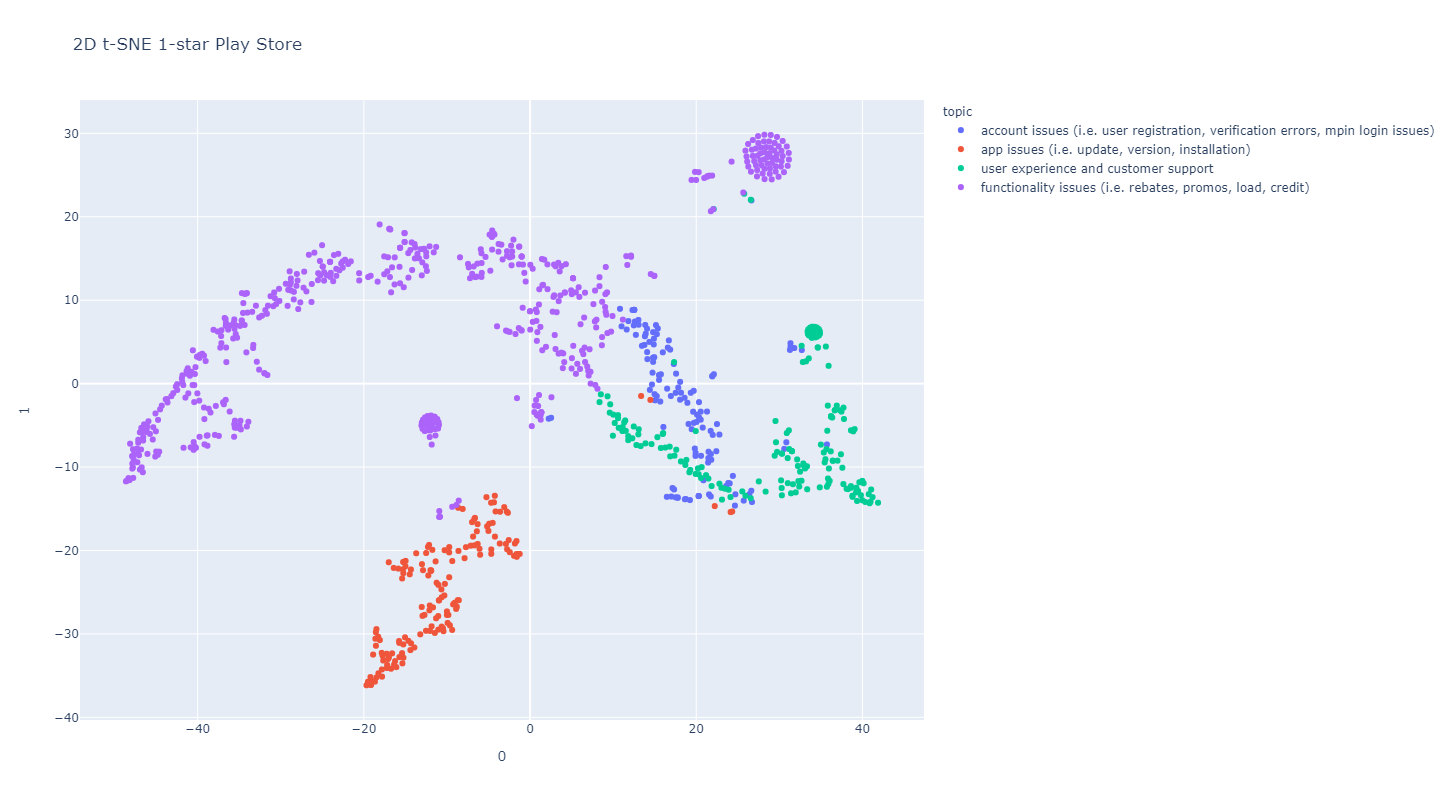

In [47]:
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from itertools import cycle
from umap.umap_ import UMAP

topics = ['account issues (i.e. user registration, verification errors, mpin login issues)', \
          'app issues (i.e. update, version, installation)', 'user experience and customer support', 'functionality issues (i.e. rebates, promos, load, credit)']


# Array of topic weights    
arr = pd.DataFrame(predictions).fillna(0).values

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# Topic colors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

tsne_model = TSNE(n_components=2, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter(
    projections, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D t-SNE 1-star Play Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.update_layout(width=1450, height=800)
fig.show()

# # to persist outside current session
# fig.show(renderer='png', width=1500, height=500)

In [54]:
tsne_model = TSNE(n_components=3, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D t-SNE 1-star Play Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.update_traces(marker_size=8)
fig.update_layout(width=1450, height=800)
fig.show()

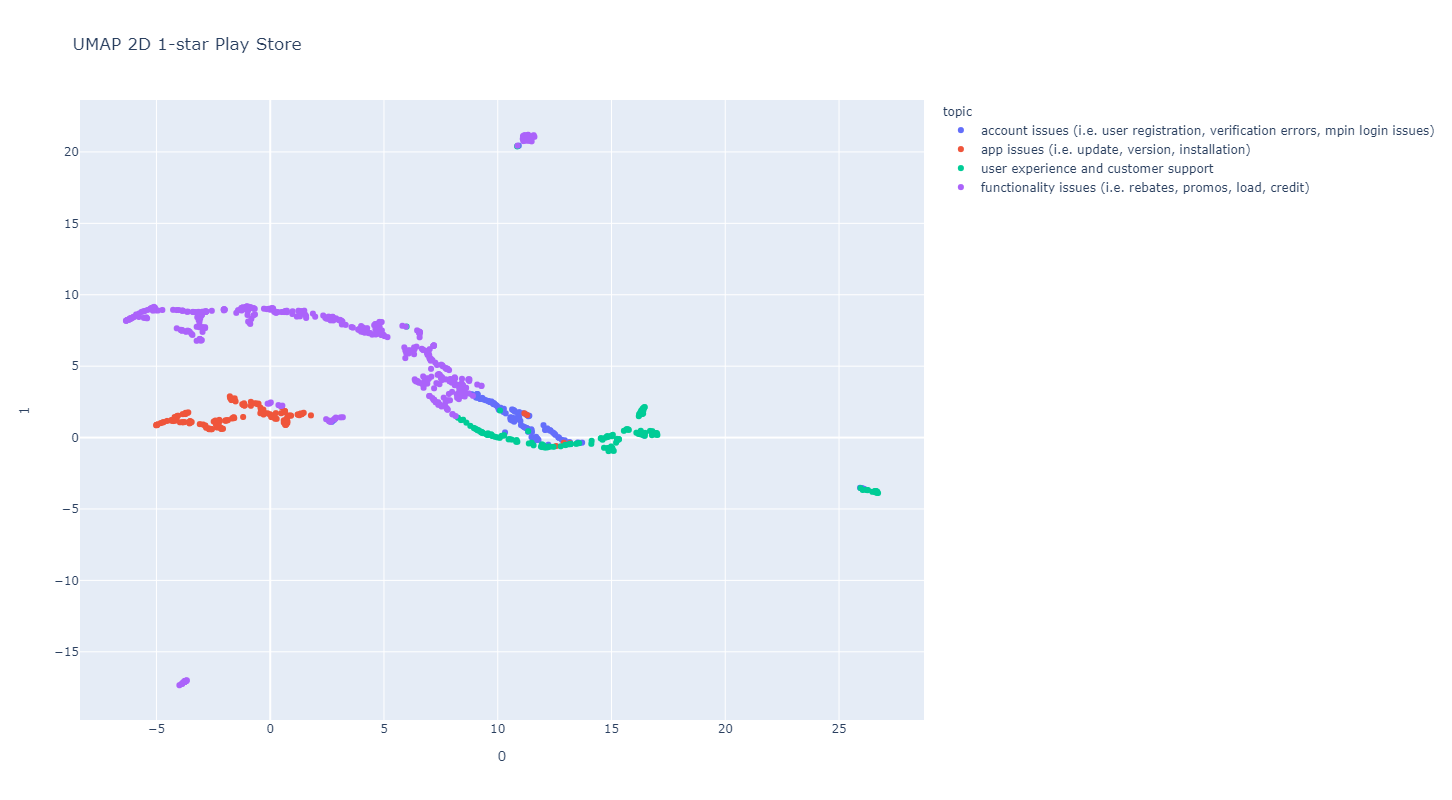

In [51]:
umap_2d = UMAP(n_components=2, random_state=0)
umap_3d = UMAP(n_components=3, random_state=0)

proj_2d = umap_2d.fit_transform(arr)
proj_3d = umap_3d.fit_transform(arr)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='UMAP 2D 1-star Play Store'
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='UMAP 3D 1-star Play Store'
)
fig_3d.update_traces(marker_size=5)


labels = cycle(topics)

labels_2d = cycle(topics)
labels_3d = cycle(topics)

fig_2d.for_each_trace(lambda t:  t.update(name = next(labels_2d)))
fig_3d.for_each_trace(lambda t:  t.update(name = next(labels_3d)))
fig_2d.update_layout(width=1450, height=800)
fig_2d.show()

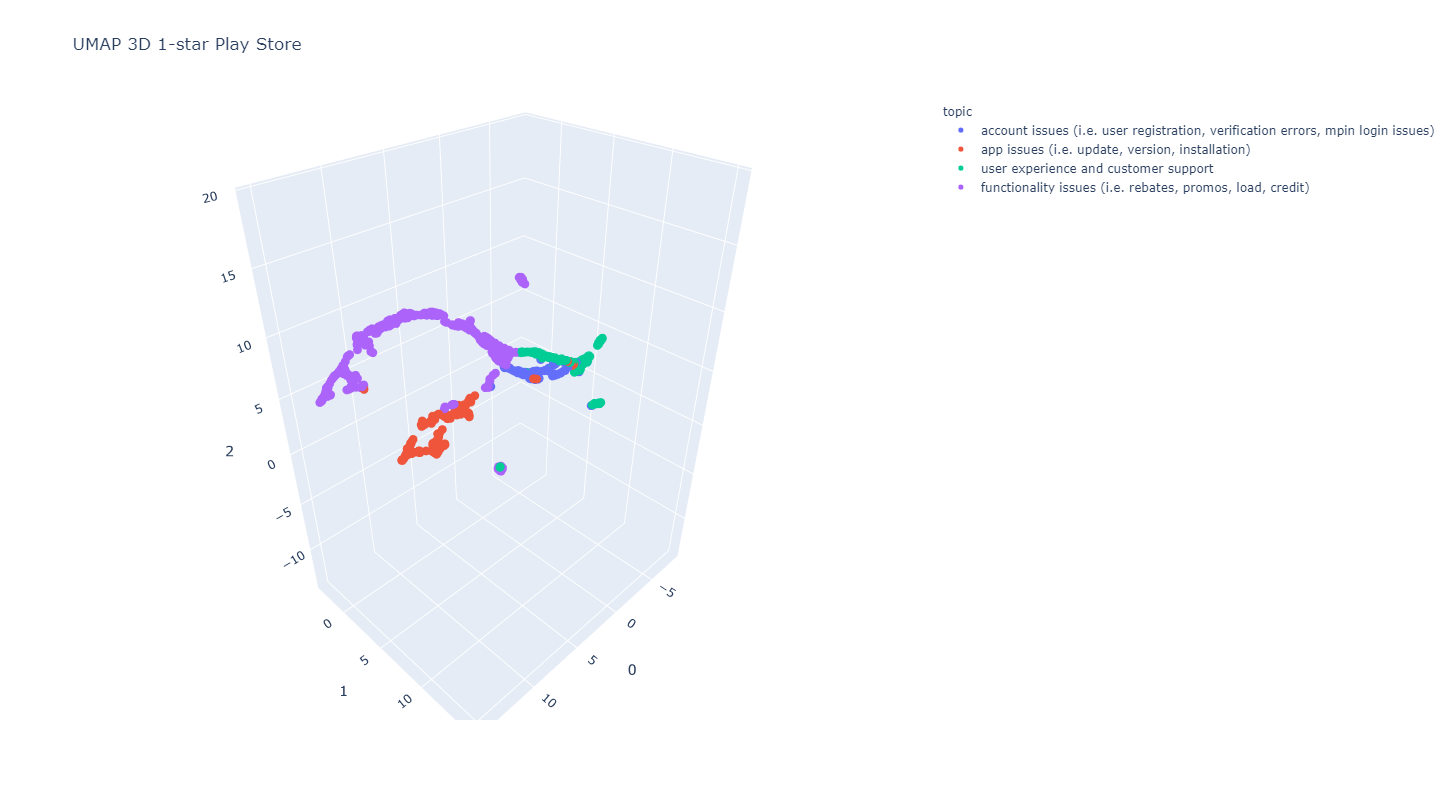

In [52]:
fig_3d.update_layout(width=1450, height=800)
fig_3d.show()

In [ ]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')

In [ ]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Delete endpoint after performing inferences
---

In [ ]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

## Load model artifacts stored in output directory
---

In [ ]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

In [ ]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [ ]:
!pwd

In [ ]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

In [ ]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 4
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 1-star App Store model
---

In [ ]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 3

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='relu',
    learning_rate=0.000845,
    mini_batch_size=1198,
    optimizer='sgd',
    rescale_gradient=0.874587,
    weight_decay=0.407700
)

In [ ]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

In [ ]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

## Deploy endpoint
---

In [ ]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

## Perform sample inferences
---

In [ ]:
test_vectors.shape

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 300

# 1-star App Store topics
topics = ['account issues (i.e. authentication, verification, mpin login)', 'appeals for customer support', 'negative user experience']

predictor = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

In [ ]:
results = {'predictions': [{'topic_weights': [0.3359525204, 0.3351599872, 0.3288874924]}, {'topic_weights': [0.3356664479, 0.3351382911, 0.3291952014]}, {'topic_weights': [0.3357141018, 0.3353073895, 0.3289784789]}, {'topic_weights': [0.3359294534, 0.3348086774, 0.3292618394]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360465765, 0.3342786133, 0.32967484]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3358630538, 0.3345240057, 0.3296129107]}, {'topic_weights': [0.336014986, 0.3345742822, 0.3294107318]}, {'topic_weights': [0.3359067738, 0.334625423, 0.3294678032]}, {'topic_weights': [0.3356122375, 0.3355079591, 0.3288797736]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3360276222, 0.3347846568, 0.3291877508]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356663287, 0.3351432979, 0.3291903436]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357331157, 0.334554106, 0.3297127485]}, {'topic_weights': [0.3360758722, 0.3347057104, 0.3292183876]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356893361, 0.3347221911, 0.329588443]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.335894227, 0.3350242674, 0.3290815353]}, {'topic_weights': [0.3355760276, 0.3351916373, 0.3292322755]}, {'topic_weights': [0.3355988562, 0.3345760107, 0.3298251629]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.335911274, 0.3347829878, 0.3293057382]}, {'topic_weights': [0.3356434107, 0.3353053331, 0.329051286]}, {'topic_weights': [0.3361840248, 0.3345199227, 0.3292960823]}, {'topic_weights': [0.3355997801, 0.3353846669, 0.3290156126]}, {'topic_weights': [0.336175561, 0.3337904811, 0.3300339282]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359989226, 0.3342300057, 0.3297711015]}, {'topic_weights': [0.3359242678, 0.334513694, 0.3295620382]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356878459, 0.3350621462, 0.3292499781]}, {'topic_weights': [0.3355863094, 0.3350273669, 0.3293863833]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.336073637, 0.3342941999, 0.3296322227]}, {'topic_weights': [0.3356366158, 0.3348966241, 0.3294667602]}, {'topic_weights': [0.3356038034, 0.3352567852, 0.3291394114]}, {'topic_weights': [0.3356842101, 0.3344232142, 0.3298926055]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357366323, 0.3348634243, 0.3293999434]}, {'topic_weights': [0.3362550735, 0.333637625, 0.3301073313]}, {'topic_weights': [0.3356461227, 0.3348139226, 0.3295399249]}, {'topic_weights': [0.336137861, 0.3343521059, 0.3295100033]}, {'topic_weights': [0.3356033862, 0.3352832198, 0.329113394]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358976245, 0.3353961408, 0.3287062347]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360537291, 0.3343292475, 0.3296169937]}, {'topic_weights': [0.3356461227, 0.3348139226, 0.3295399249]}, {'topic_weights': [0.3356260955, 0.3353154361, 0.3290584683]}, {'topic_weights': [0.3361928761, 0.3338947594, 0.3299123943]}, {'topic_weights': [0.3357722759, 0.3349067867, 0.3293209374]}, {'topic_weights': [0.3355737925, 0.3346776068, 0.3297486305]}, {'topic_weights': [0.3359010816, 0.3349616826, 0.3291372657]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356408775, 0.3352354467, 0.3291236162]}, {'topic_weights': [0.3355918229, 0.335300684, 0.3291074932]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360671997, 0.3344439268, 0.3294889033]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3356609344, 0.3348147571, 0.3295243084]}, {'topic_weights': [0.3356662393, 0.3350007832, 0.3293330073]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358258307, 0.3343893588, 0.3297848701]}, {'topic_weights': [0.3357905447, 0.3344735205, 0.3297359347]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357292414, 0.3347838521, 0.3294869363]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3361153305, 0.3341423571, 0.3297423124]}, {'topic_weights': [0.336137861, 0.3343521059, 0.3295100033]}, {'topic_weights': [0.3361153305, 0.3341423571, 0.3297423124]}, {'topic_weights': [0.3358939588, 0.3347107172, 0.3293952942]}, {'topic_weights': [0.3359283507, 0.3341981471, 0.3298735321]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357094228, 0.3352137804, 0.329076767]}, {'topic_weights': [0.335932225, 0.3343571424, 0.3297106922]}, {'topic_weights': [0.3355492949, 0.3356166482, 0.3288340569]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360278606, 0.3348549902, 0.3291172087]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357256651, 0.3345255554, 0.3297487199]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357904553, 0.3348980844, 0.3293114901]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.336137861, 0.3343521059, 0.3295100033]}, {'topic_weights': [0.3360626698, 0.3337293565, 0.3302079737]}, {'topic_weights': [0.3355802298, 0.3351244926, 0.3292952776]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3357608318, 0.3347849548, 0.3294542134]}, {'topic_weights': [0.3359324038, 0.3341506422, 0.3299169242]}, {'topic_weights': [0.3359104395, 0.3348470032, 0.3292425275]}, {'topic_weights': [0.33582142, 0.335290432, 0.3288881481]}, {'topic_weights': [0.3356530368, 0.3349626064, 0.3293843865]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357526362, 0.3346782327, 0.3295691013]}, {'topic_weights': [0.3359542787, 0.3341872692, 0.3298584223]}, {'topic_weights': [0.3356897235, 0.3348537982, 0.3294564486]}, {'topic_weights': [0.3357843757, 0.3348205984, 0.3293950856]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360465765, 0.3342786133, 0.32967484]}, {'topic_weights': [0.3359477222, 0.3350712955, 0.3289809823]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3361085653, 0.3343631923, 0.3295282423]}, {'topic_weights': [0.3358692229, 0.3346072733, 0.329523474]}, {'topic_weights': [0.3358616531, 0.3346623778, 0.3294760287]}, {'topic_weights': [0.3362057805, 0.3337688446, 0.3300254047]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360150754, 0.3344306052, 0.329554379]}, {'topic_weights': [0.3361557424, 0.3339631259, 0.3298811018]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357292414, 0.3347838521, 0.3294869363]}, {'topic_weights': [0.3357479572, 0.3345339, 0.3297181427]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.336143136, 0.334218055, 0.329638809]}, {'topic_weights': [0.3364053667, 0.3334991932, 0.3300954998]}, {'topic_weights': [0.3358744383, 0.3345209956, 0.3296045959]}, {'topic_weights': [0.335847795, 0.3344943821, 0.3296578526]}, {'topic_weights': [0.3359324038, 0.3341506422, 0.3299169242]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356033862, 0.3352832198, 0.329113394]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357987702, 0.3347512782, 0.3294499218]}, {'topic_weights': [0.3357316256, 0.3351955116, 0.3290728629]}, {'topic_weights': [0.3356471658, 0.3349188268, 0.329434067]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359193504, 0.3338191509, 0.3302614987]}, {'topic_weights': [0.3357471526, 0.3352621794, 0.3289906979]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358714283, 0.3352198303, 0.3289087415]}, {'topic_weights': [0.3360513151, 0.3345883489, 0.3293603659]}, {'topic_weights': [0.3359462023, 0.3344396949, 0.3296141624]}, {'topic_weights': [0.3356835544, 0.3352689445, 0.3290475011]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355678916, 0.3353765309, 0.3290555775]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360539377, 0.3346173167, 0.3293287456]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356122375, 0.3355079591, 0.3288797736]}, {'topic_weights': [0.3359405696, 0.3346241415, 0.3294353187]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358510733, 0.3348940909, 0.329254806]}, {'topic_weights': [0.336175561, 0.3337904811, 0.3300339282]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3362997174, 0.3333773911, 0.3303228319]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358841836, 0.3345166743, 0.3295991719]}, {'topic_weights': [0.3355492949, 0.3356166482, 0.3288340569]}, {'topic_weights': [0.3356260061, 0.3350145817, 0.3293594122]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.336143136, 0.334218055, 0.329638809]}, {'topic_weights': [0.3358363509, 0.3343726397, 0.3297909796]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356752992, 0.3343560398, 0.3299686611]}, {'topic_weights': [0.3355761468, 0.3355052769, 0.3289185762]}, {'topic_weights': [0.3356033862, 0.3352832198, 0.329113394]}, {'topic_weights': [0.3356069028, 0.3350956142, 0.3292975128]}, {'topic_weights': [0.3356516063, 0.3349483907, 0.3294000328]}, {'topic_weights': [0.3355492949, 0.3356166482, 0.3288340569]}, {'topic_weights': [0.3357292414, 0.3347838521, 0.3294869363]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357898593, 0.3348170817, 0.329393059]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359877467, 0.3338809907, 0.3301312625]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355921209, 0.3353416622, 0.3290662467]}, {'topic_weights': [0.3357808292, 0.3348414302, 0.3293777108]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359298706, 0.3341692686, 0.3299008608]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360114396, 0.3346192241, 0.3293693364]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359902799, 0.3340242207, 0.3299855292]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359525204, 0.3351599872, 0.3288874924]}, {'topic_weights': [0.3362525403, 0.3334444463, 0.3303029835]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357898593, 0.3348170817, 0.329393059]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3362522721, 0.3334929943, 0.3302547038]}, {'topic_weights': [0.3359613121, 0.3341650963, 0.3298736215]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360650539, 0.3335147798, 0.3304201663]}, {'topic_weights': [0.3357639611, 0.3346565962, 0.3295794725]}, {'topic_weights': [0.335914731, 0.3346272707, 0.3294579983]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356510103, 0.3349530101, 0.3293959498]}, {'topic_weights': [0.3360626698, 0.3337293565, 0.3302079737]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3361085653, 0.3343631923, 0.3295282423]}, {'topic_weights': [0.3356231451, 0.3349487185, 0.3294281662]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358370066, 0.3353627324, 0.3288002908]}, {'topic_weights': [0.3361262083, 0.3340829611, 0.3297908008]}, {'topic_weights': [0.3359545469, 0.3339648247, 0.3300806284]}, {'topic_weights': [0.3360732794, 0.3343279362, 0.3295987844]}, {'topic_weights': [0.3361275196, 0.3344229162, 0.3294495344]}, {'topic_weights': [0.3361175954, 0.3343823552, 0.3295000494]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3362966478, 0.3340488374, 0.3296545148]}, {'topic_weights': [0.3359797895, 0.3346709013, 0.3293493092]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3361540139, 0.3344325423, 0.329413414]}, {'topic_weights': [0.3360696137, 0.334595412, 0.3293349147]}, {'topic_weights': [0.3355760276, 0.3351916373, 0.3292322755]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3361557424, 0.3339631259, 0.3298811018]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3358305097, 0.3347555101, 0.3294139802]}, {'topic_weights': [0.3359844387, 0.334314853, 0.3297007084]}, {'topic_weights': [0.3359287381, 0.334923178, 0.3291481435]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357623816, 0.3349173963, 0.3293202519]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359466791, 0.3351174593, 0.3289358914]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.336108923, 0.3344777226, 0.3294133246]}, {'topic_weights': [0.3361673355, 0.3337762952, 0.3300563395]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357494771, 0.3348597884, 0.3293907046]}, {'topic_weights': [0.3355686367, 0.3353977203, 0.3290336132]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356461227, 0.3348139226, 0.3295399249]}, {'topic_weights': [0.3356033862, 0.3352832198, 0.329113394]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359545469, 0.3339648247, 0.3300806284]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357084692, 0.3349289894, 0.3293625712]}, {'topic_weights': [0.3355788887, 0.3351837695, 0.3292374015]}, {'topic_weights': [0.3357898593, 0.3348170817, 0.329393059]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3359866738, 0.3346560895, 0.3293572664]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3362088203, 0.3342492282, 0.329542011]}, {'topic_weights': [0.3356461227, 0.3348139226, 0.3295399249]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356461227, 0.3348139226, 0.3295399249]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360848129, 0.3346251547, 0.3292900026]}, {'topic_weights': [0.3356033862, 0.3352832198, 0.329113394]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356320858, 0.3349487185, 0.3294191658]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3360421062, 0.3344079256, 0.3295500278]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3356080651, 0.3353472352, 0.3290446997]}, {'topic_weights': [0.3355530202, 0.3355957866, 0.328851223]}, {'topic_weights': [0.3357808292, 0.3348414302, 0.3293777108]}]}

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
topics = ['account issues (i.e. authentication, verification, mpin login)', 'appeals for customer support', 'negative user experience']

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(predictions).fillna(0).values

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# Topic colors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

tsne_model = TSNE(n_components=2, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter(
    projections, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D t-SNE 1-star App Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.show()

In [ ]:
tsne_model = TSNE(n_components=3, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D t-SNE 1-star App Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
umap_2d = UMAP(n_components=2, random_state=0)
umap_3d = UMAP(n_components=3, random_state=0)

proj_2d = umap_2d.fit_transform(arr)
proj_3d = umap_3d.fit_transform(arr)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D UMAP 1-star App Store'
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D UMAP 1-star App Store'
)
fig_3d.update_traces(marker_size=8)

labels_2d = cycle(topics)
labels_3d = cycle(topics)

fig_2d.for_each_trace(lambda t:  t.update(name = next(labels_2d)))
fig_3d.for_each_trace(lambda t:  t.update(name = next(labels_3d)))
fig_2d.show()

In [ ]:
fig_3d.show()

In [ ]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')

In [ ]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

## Delete endpoint after performing inferences
---

In [ ]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [ ]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

In [ ]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [ ]:
!pwd

In [ ]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

In [ ]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 4
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 5-star Play Store model
---

In [ ]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 2

# Best config ~ ~ ~ ~ ~ ~ 
# 'encoder_layers': 'auto', 'mini_batch_size': '1989', 'epochs': '100', 'encoder_layers_activation': 'sigmoid', 'optimizer': 'adam', 'tolerance': '0.001', \
# 'num_patience_epochs': '5', 'batch_norm': 'True', 'rescale_gradient': '0.44133064053525295', 'clip_gradient': 'Inf', 'weight_decay': '0.32261615305350366', \
# 'learning_rate': '0.014080944527150089', 'sub_sample': '1.0', '_tuning_objective_metric': '', '_data_format': 'record', '_num_gpus': 'auto', '_num_kv_servers': \
# 'auto', '_kvstore': 'auto_gpu', 'feature_dim': '3099', 'num_topics': '2'

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='sigmoid',
    learning_rate=0.014080944527150089,
    mini_batch_size=1989,
    optimizer='adam',
    rescale_gradient=0.44133064053525295,
    weight_decay=0.32261615305350366
)

In [ ]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

In [ ]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

## Deploy endpoint
---

In [ ]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

## Perform sample inferences
---

In [ ]:
test_vectors.shape

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 200

# 5-star Play Store
topics = ['good user experience', 'good user experience']
          
predictor = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

In [ ]:
results = {'predictions': [{'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4962702096, 0.5037297606]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5080029368, 0.491997093]}, {'topic_weights': [0.5040445328, 0.4959554672]}, {'topic_weights': [0.5070245862, 0.492975384]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5064865947, 0.4935134351]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4877569079, 0.5122430921]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.508122921, 0.4918771088]}, {'topic_weights': [0.5075503588, 0.4924495816]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5071396828, 0.4928603172]}, {'topic_weights': [0.5080677867, 0.4919322133]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4877569079, 0.5122430921]}, {'topic_weights': [0.5069897175, 0.4930102825]}, {'topic_weights': [0.507435739, 0.4925642312]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5071516633, 0.4928483367]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5082746744, 0.4917253554]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5062692761, 0.4937307239]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5076314211, 0.4923686087]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4877569079, 0.5122430921]}, {'topic_weights': [0.506601274, 0.4933986962]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5074219108, 0.4925780892]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5070956945, 0.4929043055]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4952918589, 0.5047081113]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5014055371, 0.4985944331]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.502904892, 0.497095108]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.4850049317, 0.5149950981]}, {'topic_weights': [0.5076242685, 0.4923757017]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5069848299, 0.4930151701]}, {'topic_weights': [0.5067699552, 0.4932299852]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5065768957, 0.4934231043]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5075282454, 0.4924717546]}, {'topic_weights': [0.5090527534, 0.4909472764]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5075868368, 0.4924132228]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5057165027, 0.4942835271]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5063838363, 0.4936161935]}, {'topic_weights': [0.5071738958, 0.4928261042]}, {'topic_weights': [0.4962702096, 0.5037297606]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5051937103, 0.4948062897]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.506906569, 0.493093431]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.506878376, 0.4931215942]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5064901114, 0.493509829]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5077752471, 0.4922247529]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5062679052, 0.493732065]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5068992376, 0.4931007028]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5070763826, 0.4929235876]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.5076852441, 0.4923147261]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}, {'topic_weights': [0.507219851, 0.4927801788]}]}

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
topics = ['good user experience', 'good user experience']

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(predictions).fillna(0).values

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# Topic colors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

tsne_model = TSNE(n_components=2, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter(
    projections, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D t-SNE 5-star Play Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.show()

In [ ]:
tsne_model = TSNE(n_components=3, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D t-SNE 5-star Play Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
umap_2d = UMAP(n_components=2, random_state=0)
umap_3d = UMAP(n_components=3, random_state=0)

proj_2d = umap_2d.fit_transform(arr)
proj_3d = umap_3d.fit_transform(arr)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D UMAP 5-star Play Store'
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D UMAP 5-star Play Store'
)
fig_3d.update_traces(marker_size=5)

labels_2d = cycle(topics)
labels_3d = cycle(topics)

fig_2d.for_each_trace(lambda t:  t.update(name = next(labels_2d)))
fig_3d.for_each_trace(lambda t:  t.update(name = next(labels_3d)))
fig_2d.show()

In [ ]:
fig_3d.show()

In [ ]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')

In [ ]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

## Delete endpoint after performing inferences
---

In [ ]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [ ]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

In [ ]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [ ]:
!pwd

In [ ]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

In [ ]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 5
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 5-star App Store model
---

In [ ]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 2

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='sigmoid',
    learning_rate=0.004531,
    mini_batch_size=2042,
    optimizer='adadelta',
    rescale_gradient=0.621600,
    weight_decay=0.286122
)

In [ ]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

In [ ]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

## Deploy endpoint
---

In [ ]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

## Perform sample inferences
---

In [ ]:
test_vectors.shape

In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 39

# 5-star App Store topics
topics = ['positive user experience, prominent features', 'maintenance requests and general inquiries'] 
          
predictor_2 = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor_2.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

In [ ]:
results = {'predictions': [{'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}, {'topic_weights': [0.4838923216, 0.5161076784]}]}

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
topics = ['positive user experience, prominent features', 'maintenance requests and general inquiries'] 

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(predictions).fillna(0).values

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# Topic colors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

tsne_model = TSNE(n_components=2, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter(
    projections, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D t-SNE 5-star App Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.show()

In [ ]:
tsne_model = TSNE(n_components=3, random_state=0)
projections = tsne_model.fit_transform(arr)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D t-SNE 5-star App Store'
)

labels = cycle(topics)

fig.for_each_trace(lambda t:  t.update(name = next(labels)))
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
umap_2d = UMAP(n_components=2, random_state=0)
umap_3d = UMAP(n_components=3, random_state=0)

proj_2d = umap_2d.fit_transform(arr)
proj_3d = umap_3d.fit_transform(arr)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='2D UMAP 5-star App Store'
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=mycolors[topic_num], 
    labels={'color': 'topic'},
    title='3D UMAP 5-star App Store'
)
fig_3d.update_traces(marker_size=5)

labels_2d = cycle(topics)
labels_3d = cycle(topics)

fig_2d.for_each_trace(lambda t:  t.update(name = next(labels_2d)))
fig_3d.for_each_trace(lambda t:  t.update(name = next(labels_3d)))
fig_2d.show()

In [ ]:
fig_3d.show()

In [ ]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')

In [ ]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

## Delete endpoint after performing inferences
---

In [ ]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [ ]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

In [ ]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [ ]:
!pwd

In [ ]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

In [ ]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 5
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1